# <center> Predict whether an employee will stay or leave.

---
# <font size=6, color=brown>Table of Contents</font>
---
**1.** [**Introduction to Project**](#Section1)<br>

**2.** [**Problem Statement**](#Section2)

**3.** [**Importing Libraries**](#Section3)<br>

**4.** [**Data Description**](#Section4)<br>

**5.** [**Connecting to server to access Database**](#Section5)<br>

**6.** [**Data Pre-processing & Pre-profiling**](#Section6)<br>
- **6.1** [**Data Pre-profiling**](#Section61)<br>
- **6.2** [**Data Pre-processing**](#Section62)<br>

**7.** [**Exploratory Data Analysis**](#Section7)

**8.** [**Training the model**](#Section8)<br>
- **8.1** [**Best model selection using Pipeline**](#Section81)<br>

**9.** [**Apply the trained model on unseen Data**](#Section9)<br>

**10.** [**Conclusion**](#Section10)<br>

---
<a name = Section1></a>
## <font color=blue>1. Introduction to Project <p>

<img width=25% src= "https://projects.insaid.co/capstone2/companylogo.png" align=left> <img width=50% src= "https://projects.insaid.co/capstone2/hr.png">




<b>Your client for this project is the HR Department at a software company.</b>

- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.

<b>Current Practice</b>
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

<b>This suffers from the following problems:</b>

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

The HR department has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

---

---
<a name = Section2></a>

## <font color=blue>2. Problem Statement

<b>Your Role</b>
- You are given datasets of past employees and their status (still employed or already left).
- Your task is to build a classification model using the datasets.
- Because there was no machine learning model for this problem in the company, you don’t have quantifiable win condition. You need to build the best possible model.

<b>Problem Specifics</b><br>
Deliverable: Predict whether an employee will stay or leave.<br>
Machine learning task: Classification<br>
Target variable: Status (Employed/Left)<br>
Win condition: N/A (best possible model)

---

---
<a name = Section3></a>
# <font color=blue>**3. Importing Libraries**</font>
---

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import mysql.connector                                              # Importing package mysql connecot (to connect sql database)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # Importing to split the data into train and test data
from sklearn.preprocessing import OneHotEncoder                     # Importing One Hot Encoder library from preprocessing
from sklearn.preprocessing import StandardScaler                    # Importing Standard Scaler library from preprocessing
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.pipeline import Pipeline                               # To make pipeline
from sklearn.compose import ColumnTransformer                       # To transform columns
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV                    # To find best hyperparamter settings for the algorithm
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                 # To instantiate a Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.ensemble import RandomForestClassifier                 # To implement Random Forest classifier
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix        # To calculate the accuracy of classifiers
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings('ignore')                                   # Warnings will appear only once

---
<a name = Section4></a>

## <font color=blue>4. Data Description

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

1. department_data<br>
 This dataset contains information about each department. The schema of the dataset is as follows:
    - dept_id – Unique Department Code
    - dept_name – Name of the Department
    - dept_head – Name of the Head of the Department


2. employee_details_data<br>
 This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:
    - employee_id – Unique ID Number for each employee
    - age – Age of the employee
    - gender – Gender of the employee
    - marital_status – Marital Status of the employee


3. employee_data<br>
 This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

    <b>Target variable</b>
    - status – Current employment status (Employed / Left)

    <b>Administrative information</b>
    - department – Department to which the employees belong(ed) to
    - salary – Salary level with respect to rest of their department
    - tenure – Number of years at the company
    - recently_promoted – Was the employee promoted in the last 3 years?
    - employee_id – Unique ID Number for each employee
    
    <b>Workload information</b>
    - n_projects – Number of projects employee has worked on
    - avg_monthly_hrs – Average number of hours worked per month
    
    <b>Mutual evaluation information</b>
    - satisfaction – Score for employee’s satisfaction with the company (higher is better)
    - last_evaluation – Score for most recent evaluation of employee (higher is better)
    - filed_complaint – Has the employee filed a formal complaint in the last 3 years?
---

---
<a name = Section5></a>
# <font color=blue>**5. Connecting to server to access Database**</font>
---

In [15]:
# Python program to connect
# to mysql database

# Connecting from the server
conn = mysql.connector.connect(host='cpanel.insaid.co',
                               user='student',
                               password='student',
                               database='Capstone2')

print("Connection Eshtablished")

Connection Eshtablished


In [10]:
# access tables from the databse & assign varibles to those tables

cursor=conn.cursor()

query1= 'select * from department_data'
query2= 'select * from employee_details_data'
query3= 'select * from employee_data'

In [6]:
# access the first table and check its header & details

cursor.execute(query1)
department_df_columns=cursor.description
department_df_result=cursor.fetchall()
print(department_df_columns)
print(department_df_result)

[('dept_id', 253, None, None, None, None, 1, 0), ('dept_name', 253, None, None, None, None, 1, 0), ('dept_head', 253, None, None, None, None, 1, 0)]
[('D00-IT', 'IT', 'Henry Adey'), ('D00-SS', 'Sales', 'Edward J Bayley'), ('D00-TP', 'Temp', 'Micheal Zachrey'), ('D00-ENG', 'Engineering', 'Sushant Raghunathan K'), ('D00-SP', 'Support', 'Amelia Westray'), ('D00-FN', 'Finance', 'Aanchal J'), ('D00-PR', 'Procurement', 'Louie Viles'), ('D00-AD', 'Admin', 'Evelyn Tolson'), ('D00-MN', 'Management', 'Ellie Trafton'), ('D00-MT', 'Marketing', 'Reuben Swann'), ('D00-PD', 'Product', 'Darcy Staines')]


In [16]:
# save the first table in csv 

rows = department_df_result
np.savetxt("department_df.csv",rows, delimiter =", ", 
           fmt ='% s', header="dept_id,dept_name,dept_head")

print("successful")

successful


In [11]:
# access the second table and check its header & details

cursor.execute(query2)
emp_details_df_columns=cursor.description
emp_details_df_result=cursor.fetchall()
print(emp_details_df_columns)
print(emp_details_df_result)

[('employee_id', 3, None, None, None, None, 1, 0), ('age', 3, None, None, None, None, 1, 0), ('gender', 253, None, None, None, None, 1, 0), ('marital_status', 253, None, None, None, None, 1, 0)]
[(113558, 43, 'Male', 'Married'), (112256, 24, 'Female', 'Unmarried'), (112586, 22, 'Female', 'Unmarried'), (108071, 36, 'Male', 'Married'), (116915, 38, 'Male', 'Married'), (104555, 22, 'Male', 'Unmarried'), (104706, 51, 'Male', 'Married'), (118536, 54, 'Male', 'Married'), (111712, 43, 'Male', 'Married'), (119150, 49, 'Male', 'Married'), (109162, 37, 'Male', 'Married'), (105251, 27, 'Male', 'Unmarried'), (104544, 43, 'Female', 'Married'), (102700, 47, 'Male', 'Married'), (113732, 28, 'Male', 'Unmarried'), (108147, 53, 'Male', 'Married'), (110690, 28, 'Male', 'Unmarried'), (115701, 24, 'Male', 'Unmarried'), (108054, 39, 'Male', 'Married'), (116648, 43, 'Male', 'Married'), (102076, 35, 'Female', 'Married'), (114178, 42, 'Male', 'Married'), (106163, 22, 'Male', 'Unmarried'), (102212, 49, 'Male', 

In [17]:
# save the second table in csv 

rows = emp_details_df_result
np.savetxt("employee_details_df.csv",rows, delimiter =", ", 
           fmt ='% s', header="employee_id,age,gender,marital_status")

print("successful")

successful


In [13]:
# access the third table and check its header & details

cursor.execute(query3)
employee_df_columns=cursor.description
employee_df_result=cursor.fetchall()
print(employee_df_columns)
print(department_df_result)

[('avg_monthly_hrs', 246, None, None, None, None, 1, 0), ('department', 253, None, None, None, None, 1, 0), ('filed_complaint', 246, None, None, None, None, 1, 0), ('last_evaluation', 4, None, None, None, None, 1, 0), ('n_projects', 3, None, None, None, None, 1, 0), ('recently_promoted', 3, None, None, None, None, 1, 0), ('salary', 253, None, None, None, None, 1, 0), ('satisfaction', 4, None, None, None, None, 1, 0), ('status', 253, None, None, None, None, 1, 0), ('tenure', 246, None, None, None, None, 1, 0), ('employee_id', 3, None, None, None, None, 1, 0)]
[('D00-IT', 'IT', 'Henry Adey'), ('D00-SS', 'Sales', 'Edward J Bayley'), ('D00-TP', 'Temp', 'Micheal Zachrey'), ('D00-ENG', 'Engineering', 'Sushant Raghunathan K'), ('D00-SP', 'Support', 'Amelia Westray'), ('D00-FN', 'Finance', 'Aanchal J'), ('D00-PR', 'Procurement', 'Louie Viles'), ('D00-AD', 'Admin', 'Evelyn Tolson'), ('D00-MN', 'Management', 'Ellie Trafton'), ('D00-MT', 'Marketing', 'Reuben Swann'), ('D00-PD', 'Product', 'Darcy 

In [25]:
# save the third table in csv 

rows = employee_df_result
np.savetxt("employee_df.csv",rows, delimiter =", ", 
           fmt ='% s', header="avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id")

print("successful")

successful


---
<a name = Section6></a>
# <font color=blue>**6. Data Acquisition and Description**</font>
---

## import the downloaded csv for analysis

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  brown dotted;
    color: #808080;
}
</style>

### First CSV File : Named as 'department'

In [4]:
department_df = pd.read_csv(r"C:\Users\Mahesh\Downloads\Python\department_df.csv", skipinitialspace=True)
print(department_df.shape)
department_df

(11, 3)


,# dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [5]:
department_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   # dept_id  11 non-null     object
 1   dept_name  11 non-null     object
 2   dept_head  11 non-null     object
dtypes: object(3)
memory usage: 392.0+ bytes


In [6]:
# to check any anomalies in columns heading & values

print(department_df.columns)
print(department_df['# dept_id'].unique())
print(department_df['dept_name'].unique())
print(department_df['dept_head'].unique())

Index(['# dept_id', 'dept_name', 'dept_head'], dtype='object')
['D00-IT' 'D00-SS' 'D00-TP' 'D00-ENG' 'D00-SP' 'D00-FN' 'D00-PR' 'D00-AD'
 'D00-MN' 'D00-MT' 'D00-PD']
['IT' 'Sales' 'Temp' 'Engineering' 'Support' 'Finance' 'Procurement'
 'Admin' 'Management' 'Marketing' 'Product']
['Henry Adey' 'Edward J Bayley' 'Micheal Zachrey' 'Sushant Raghunathan K'
 'Amelia Westray' 'Aanchal J' 'Louie Viles' 'Evelyn Tolson'
 'Ellie Trafton' 'Reuben Swann' 'Darcy Staines']


### Second CSV File : Named as 'emp_personal_details'

In [7]:
emp_personal_details = pd.read_csv(r"C:\Users\Mahesh\Downloads\Python\employee_details_df.csv", skipinitialspace=True,
                                   na_values=np.nan)
print(emp_personal_details.shape)
emp_personal_details.head()

(14245, 4)


,# employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [8]:
emp_personal_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   # employee_id   14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


In [9]:
# to check any anomalies in column headings & values

print(emp_personal_details.columns)
print(emp_personal_details['age'].unique())
print(emp_personal_details['gender'].unique())
print(emp_personal_details['marital_status'].unique())

Index(['# employee_id', 'age', 'gender', 'marital_status'], dtype='object')
[43 24 22 36 38 51 54 49 37 27 47 28 53 39 35 42 40 23 45 25 30 34 26 44
 52 31 32 33 29 41 46 48 57 50 55 56]
['Male' 'Female']
['Married' 'Unmarried']


### Third CSV File : Named as 'emp_df'

In [10]:
emp_df = pd.read_csv(r"C:\Users\Mahesh\Downloads\Python\employee_df.csv", skipinitialspace=True)
print(emp_df.shape)
emp_df.head()

(14150, 11)


,# avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,None,0.866838,6,None,medium,0.134415,Left,4.00,124467
1,134.0,None,None,0.555718,2,None,low,0.511041,Left,3.00,112210
2,156.0,D00-SS,1.00,0.474082,2,None,medium,0.405101,Left,3.00,126150
3,256.0,D00-SP,None,0.96136,6,None,low,0.152974,Left,4.00,125346
4,146.0,D00-SS,None,0.507349,2,None,medium,0.434845,Left,3.00,113707


In [11]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   # avg_monthly_hrs  14150 non-null  float64
 1   department         14150 non-null  object 
 2   filed_complaint    14150 non-null  object 
 3   last_evaluation    14150 non-null  object 
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  14150 non-null  object 
 6   salary             14150 non-null  object 
 7   satisfaction       14150 non-null  object 
 8   status             14150 non-null  object 
 9   tenure             14150 non-null  object 
 10  employee_id        14150 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.2+ MB


In [12]:
# to check any anomalies in column headings & values

print(emp_df.columns)
print(emp_df['department'].unique())
print(emp_df['status'].unique())
print(emp_df['status'].unique())

Index(['# avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')
['None' 'D00-SS' 'D00-SP' 'D00-MT' 'D00-PD' 'D00-IT' 'D00-AD' 'D00-MN'
 'D00-ENG' 'D00-PR' 'D00-TP' 'D00-FN' '-IT']
['Left' 'Employed']
['Left' 'Employed']


<div class="alert alert-block alert-danger" >
    
<span style='background:yellow'><b>Observations:</b></span><br>
- We can observe there are some <u>null</u> values which are convtered as <u>'None'</u> while coverting into csv file in <b> emp_df</b>.
- in emp_df, ['filed_complaint', 'last_evaluation', 'recently_promoted', 'satisfaction', 'tenure'] fetures need to be conveterd as continuous data type.
- The First column name of all the dataframes contains #, need to remove.
</div>

In [13]:
# replace None text with Null

emp_df=emp_df.replace(to_replace='None',value=np.nan,regex=True)

# remove '#' from the headings & keep consistaencey in headings

emp_personal_details.rename(columns={"# employee_id": "employee_id"}, inplace=True)
emp_df.rename(columns={"# avg_monthly_hrs":"avg_monthly_hrs", "# dept_id": "dept_id", "dept_name":"department"}, inplace=True)

## Checking for Duplicate values

In [14]:
# checking duplicates in emp_personal_details

emp_personal_details.duplicated().sum()

0

In [15]:
# checking duplicates in Emp_df

print(emp_df[emp_df.duplicated()].shape)
emp_df[emp_df.duplicated()]

(29, 11)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
14121,265.0,D00-MN,1.00,0.825672,3,NaN,low,0.545978,Employed,10.00,112373
14122,282.0,D00-SS,NaN,0.875427,6,NaN,low,0.0659081,Left,4.00,116247
14123,206.0,D00-SS,NaN,1.0,6,NaN,medium,0.783548,Left,5.00,112203
14124,161.0,D00-IT,NaN,0.715893,6,NaN,medium,0.867768,Left,4.00,108128
14125,163.0,D00-SP,NaN,0.486176,3,NaN,medium,0.832118,Employed,3.00,115446
14126,208.0,D00-FN,NaN,0.699756,4,NaN,low,0.476216,Employed,5.00,110546
14127,152.0,D00-MT,NaN,0.510016,3,NaN,low,0.826531,Employed,2.00,111968
14128,307.0,D00-IT,NaN,0.905708,7,NaN,low,0.125275,Left,4.00,111323
14129,212.0,D00-PD,NaN,0.773018,4,NaN,medium,0.829316,Employed,2.00,117454
14130,148.0,D00-MN,NaN,0.577112,3,NaN,high,0.481001,Employed,10.00,109425


<div class="alert alert-block alert-danger" >
    
<span style='background:yellow'><b>Observations:</b></span><br>
- There are 29 duplicate values which need to be dropped.
</div>

In [16]:
# dropiing duplicate values

emp_df=emp_df[~emp_df.duplicated()]

In [17]:
# creating a fucntion to check value counts in all the columns

def ValueCounts(df):
    for col in df.columns:
        print(df[col].value_counts(dropna=False))
        print("="*50, "\n")

In [18]:
# checking value counts in Emp_df

ValueCounts(emp_df)

135.0    143
156.0    141
151.0    140
149.0    139
145.0    125
        ... 
75.0       1
71.0       1
56.0       1
65.0       1
88.0       1
Name: avg_monthly_hrs, Length: 249, dtype: int64

D00-SS     3896
D00-ENG    2575
D00-SP     2109
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
NaN         707
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

NaN     12080
1.00     2041
Name: filed_complaint, dtype: int64

NaN         1487
1.0          356
0.896246       3
0.505883       3
0.613732       2
            ... 
0.957656       1
0.738571       1
0.623016       1
0.668078       1
0.907277       1
Name: last_evaluation, Length: 12189, dtype: int64

4    4044
3    3788
5    2568
2    2323
6    1095
7     242
1      61
Name: n_projects, dtype: int64

NaN    13824
1        297
Name: recently_promoted, dtype: int64

low       6893
medium    6087
high      1141
Name: salary, dtype: int64

1.0         356
NaN    

In [19]:
# checking value counts in Emp_df

ValueCounts(emp_personal_details)

113558    1
105958    1
102997    1
110185    1
118385    1
         ..
107064    1
115991    1
119377    1
109889    1
118849    1
Name: employee_id, Length: 14245, dtype: int64

24    1319
25    1255
23    1209
22    1175
27     674
29     669
28     651
26     633
42     306
37     285
32     281
47     281
33     280
46     277
39     275
30     275
48     274
40     273
36     271
41     270
38     270
45     266
43     265
35     264
52     254
44     252
34     247
49     244
53     236
50     236
31     228
51     228
54     227
55      38
57      34
56      23
Name: age, dtype: int64

Male      9382
Female    4863
Name: gender, dtype: int64

Unmarried    7283
Married      6962
Name: marital_status, dtype: int64



In [20]:
# checking null values in Emp_df

emp_df.isnull().sum()

avg_monthly_hrs          0
department             707
filed_complaint      12080
last_evaluation       1487
n_projects               0
recently_promoted    13824
salary                   0
satisfaction           150
status                   0
tenure                 150
employee_id              0
dtype: int64

In [21]:
emp_df.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,14121.000000,13414,2041,12634,14121.000000,297,14121,13971,14121,13971,14121.000000
unique,NaN,12,1,12188,NaN,1,3,13497,2,8,NaN
top,NaN,D00-SS,1.00,1.0,NaN,1,low,1.0,Employed,3.00,NaN
freq,NaN,3896,2041,356,NaN,297,6893,356,10763,6008,NaN
mean,199.999929,NaN,NaN,NaN,3.778132,NaN,NaN,NaN,NaN,NaN,112080.957793
std,50.832419,NaN,NaN,NaN,1.249926,NaN,NaN,NaN,NaN,NaN,8754.097968
min,49.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,155.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,105767.000000
50%,199.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,111289.000000
75%,245.000000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,116654.000000


<div class="alert alert-block alert-danger" >
    
<span style='background:yellow'><b>Observations:</b></span><br>
- There are missing values in <b><u>department</u>  ,<u> filed_complaint</u>  ,<u> last_evaluation</u>  ,<u> recently_promoted</u>  ,<u> satisfaction</u>   &   <u>tenure</u> of emp_df</b>. 
- The <b>Female</b> employees count is half of the <b>Male</b> empoyees.
- The oragnisation have almost equal count of both Married & Unmarried employees.
- Most of the employees are from <b>Sales</b> departement and there are only few employees from <b>Temporary</b> dept.
- Out of 14 thousand employees only 2 thousand have filed a formal complaint in the last 3 years.
- Only Aprox 300 of employees were promoted in the last 3 years which is around 2%.
- Around 6-7 % (out of above 2%) employees left organisation who recently promoted in 3 years.
- Around 1000 of employees are earning high salary which is around 7.14%.
- Around 3000 of employees have left the oragnisation which is around 21.4%.
- Most of the employees are from <b>2 to 4</b> years of tenure.
- Employees who left belong mostly to <b>Sales & Engineering</b> Dept.
- Less than 0.1% employees left the organisation after filling a formal complaint in the last 3 years.
- The employees who worked on 2, 6 & 7 projects mostly seem to have Left the organisation.


<span style='background:yellow'><b>Actions:</b></span><br>
- In <b>department</b> column, there are <B>707</B> missing values, which can be filled with most frequent dept.
- In <b>department</b> column, there are <B>207</B> values need to be corrected from <b>"-IT"</b> to <b>"D00-IT"</b>.
- In <b>filed_complaint</b> column, the missing values to be converted to 0.
- In <b>last_evaluation</b> column, the missing values to be converted with mean/median values or by with value/s checking with other features.
- In <b>recently_promoted</b> column, the missing values to be converted to 0  or by with value/s checking with other features.
- In <b>satisfaction</b> column, the missing values to be converted with mean/median values or by with value/s checking with other features.
- In <b>tenure</b> column, the missing values to be converted with mean/median values  or by with value/s checking with other features.
    
</div>

In [22]:
print(department_df.shape)
print(emp_personal_details.shape)
print(emp_df.shape)

(11, 3)
(14245, 4)
(14121, 11)


## Merging the dataframes to get more information

In [23]:
# lets merge Two main dataframes (Emp_df & Emp_personal_details) which have most important features

merged_df=pd.merge(emp_personal_details,emp_df, on=['employee_id'],how='inner')
print(merged_df.shape)
merged_df

(14116, 14)


,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,NaN,0.753977,5,1,medium,0.921208,Employed,4.00
1,112256,24,Female,Unmarried,201.0,D00-MN,NaN,0.964453,3,NaN,medium,0.568479,Employed,3.00
2,112586,22,Female,Unmarried,239.0,D00-SS,NaN,0.756458,3,NaN,low,0.144812,Employed,6.00
3,108071,36,Male,Married,151.0,D00-PR,NaN,0.608282,5,NaN,medium,0.2103,Employed,6.00
4,116915,38,Male,Married,259.0,-IT,NaN,0.749206,4,NaN,medium,0.888514,Employed,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,111781,26,Male,Unmarried,146.0,D00-ENG,NaN,0.95693,4,NaN,low,0.660197,Employed,10.00
14112,100372,35,Male,Married,176.0,D00-SS,NaN,NaN,4,NaN,medium,0.5291,Employed,3.00
14113,128083,30,Female,Married,300.0,D00-MN,NaN,0.972057,7,NaN,medium,0.12792,Left,4.00
14114,118487,24,Male,Unmarried,156.0,D00-IT,NaN,0.527786,2,NaN,medium,0.457555,Left,3.00


---
<a name = Section61></a>
# <font color=blue>**6.1 Data Pre-Profiling**</font>
---

In [24]:
merged_df.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
avg_monthly_hrs          0
department             706
filed_complaint      12075
last_evaluation       1487
n_projects               0
recently_promoted    13819
salary                   0
satisfaction           150
status                   0
tenure                 150
dtype: int64

In [25]:
# creating backup

df=merged_df.copy()

In [26]:
print(df[df.duplicated()].shape)
df[df.duplicated()]

(0, 14)


,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure


---
<a name = Section62></a>
# <font color=blue>**6.2 Data Pre-Processing**</font>
---

In [27]:
ValueCounts(df)

113558    1
114488    1
104890    1
109445    1
102997    1
         ..
115991    1
119377    1
109889    1
115372    1
118849    1
Name: employee_id, Length: 14116, dtype: int64

24    1308
25    1246
23    1196
22    1166
27     662
29     660
28     647
26     626
42     303
37     284
33     279
47     278
32     277
30     275
48     272
46     271
40     271
39     270
41     269
38     269
36     269
43     265
45     264
35     261
52     252
44     250
34     243
49     243
53     235
50     233
51     227
54     226
31     225
55      38
57      34
56      22
Name: age, dtype: int64

Male      9287
Female    4829
Name: gender, dtype: int64

Unmarried    7211
Married      6905
Name: marital_status, dtype: int64

135.0    143
156.0    141
151.0    140
149.0    139
145.0    125
        ... 
60.0       1
73.0       1
74.0       1
55.0       1
89.0       1
Name: avg_monthly_hrs, Length: 249, dtype: int64

D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      

In [28]:
df[df['department']=='-IT']

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
4,116915,38,Male,Married,259.0,-IT,NaN,0.749206,4,NaN,medium,0.888514,Employed,3.00
143,113360,27,Male,Unmarried,238.0,-IT,NaN,0.480189,2,NaN,low,0.951678,Employed,4.00
301,114842,24,Male,Unmarried,180.0,-IT,NaN,0.463153,4,NaN,low,0.882368,Employed,2.00
403,107227,26,Male,Unmarried,217.0,-IT,NaN,0.528443,3,NaN,high,0.729664,Employed,2.00
420,100586,24,Female,Unmarried,151.0,-IT,NaN,0.611842,2,NaN,medium,0.424099,Employed,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13836,109267,54,Male,Married,208.0,-IT,1.00,0.71713,5,NaN,low,0.512905,Employed,8.00
13902,111334,28,Male,Unmarried,216.0,-IT,NaN,0.608366,4,NaN,medium,0.956088,Employed,4.00
13909,119515,22,Female,Unmarried,267.0,-IT,NaN,0.785357,5,NaN,low,0.927001,Left,5.00
14007,107403,28,Male,Unmarried,215.0,-IT,NaN,0.835854,2,NaN,medium,0.227742,Employed,2.00


In [29]:
ValueCounts(df[df['tenure'].isnull()])

106779    1
103586    1
117472    1
102453    1
115241    1
         ..
100849    1
109047    1
118241    1
132628    1
119290    1
Name: employee_id, Length: 150, dtype: int64

23    27
25    27
24    25
22    19
26    16
29    14
27    14
28     7
49     1
Name: age, dtype: int64

Male      106
Female     44
Name: gender, dtype: int64

Unmarried    149
Married        1
Name: marital_status, dtype: int64

124.0    5
100.0    5
84.0     5
81.0     4
125.0    4
        ..
52.0     1
103.0    1
104.0    1
65.0     1
89.0     1
Name: avg_monthly_hrs, Length: 73, dtype: int64

D00-TP    150
Name: department, dtype: int64

NaN     121
1.00     29
Name: filed_complaint, dtype: int64

NaN    150
Name: last_evaluation, dtype: int64

2    79
1    61
3    10
Name: n_projects, dtype: int64

NaN    150
Name: recently_promoted, dtype: int64

medium    77
low       64
high       9
Name: salary, dtype: int64

NaN    150
Name: satisfaction, dtype: int64

Employed    130
Left         20
Name: status, d

In [30]:
df[df['department']=='D00-TP']

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
26,106779,23,Female,Unmarried,81.0,D00-TP,NaN,NaN,1,NaN,high,NaN,Employed,NaN
108,100247,25,Male,Unmarried,68.0,D00-TP,NaN,NaN,1,NaN,low,NaN,Employed,NaN
214,108823,29,Male,Unmarried,108.0,D00-TP,NaN,NaN,2,NaN,low,NaN,Employed,NaN
349,119516,25,Male,Unmarried,56.0,D00-TP,NaN,NaN,1,NaN,medium,NaN,Employed,NaN
356,113190,22,Female,Unmarried,135.0,D00-TP,1.00,NaN,2,NaN,medium,NaN,Employed,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13846,111561,22,Female,Unmarried,72.0,D00-TP,NaN,NaN,1,NaN,medium,NaN,Left,NaN
13900,118148,22,Male,Unmarried,89.0,D00-TP,NaN,NaN,2,NaN,high,NaN,Employed,NaN
13901,109306,22,Male,Unmarried,138.0,D00-TP,NaN,NaN,2,NaN,medium,NaN,Employed,NaN
13949,118113,25,Female,Unmarried,49.0,D00-TP,NaN,NaN,2,NaN,medium,NaN,Employed,NaN


<div class="alert alert-block alert-danger" >
    
<span style='background:yellow'><b>Observations:</b></span><br>
- We can Observe that there are 150 data points which are missing in tenure, satisfaction, last_evaluation and recently_promoted for specific <b> Temporary</b> Dept.
<p>

<span style='background:yellow'><b>Actions:</b></span><br>
- Because of insufficient information about Temporary Dept, we may assume their tenure would be of 1 year and satisfaction/ last_evaluation/recently_promoted  may not be applicable for them so all it can be shown as 0.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         13410 non-null  object 
 6   filed_complaint    2041 non-null   object 
 7   last_evaluation    12629 non-null  object 
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  297 non-null    object 
 10  salary             14116 non-null  object 
 11  satisfaction       13966 non-null  object 
 12  status             14116 non-null  object 
 13  tenure             13966 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.6+ MB


In [32]:
df['department']=np.where(df['department']=='-IT', 'D00-IT', df['department'])

df['last_evaluation']=np.where(df['department']=='D00-TP', "0.00", df['last_evaluation'])

df['tenure']=np.where(df['department']=='D00-TP', "1", df['tenure'])

In [33]:
df.isnull().sum()

employee_id              0
age                      0
gender                   0
marital_status           0
avg_monthly_hrs          0
department             706
filed_complaint      12075
last_evaluation       1337
n_projects               0
recently_promoted    13819
salary                   0
satisfaction           150
status                   0
tenure                   0
dtype: int64

In [34]:
# fill all the null values for filed_complaint, recently_promoted, satisfaction with 0 
# as all these features are object type hence we have to first fill it with 0 as object

df['filed_complaint']=np.where(df['filed_complaint'].isnull(), '0', df['filed_complaint'])
df['recently_promoted']=np.where(df['recently_promoted'].isnull(), '0', df['recently_promoted'])
df['satisfaction']=np.where(df['satisfaction'].isnull(), '0', df['satisfaction'])

In [35]:
# change datatype of filed_complaint, last_evaluation, recently_promoted, satisfaction and tenure

df['filed_complaint']=df['filed_complaint'].astype('float64')
df['filed_complaint']=df['filed_complaint'].astype('int64')
print(df['filed_complaint'].unique())
print("-"*10)

df['last_evaluation']=df['last_evaluation'].astype('float64')
print(df['last_evaluation'].unique())
print("-"*10)

df['recently_promoted']=df['recently_promoted'].astype('int64')
print(df['recently_promoted'].unique())
print("-"*10)

df['satisfaction']=df['satisfaction'].astype('float64')
print(df['satisfaction'].unique())
print("-"*10)

df['tenure']=df['tenure'].astype('float64')
df['tenure']=df['tenure'].astype('int64')
print(df['tenure'].unique())

[0 1]
----------
[0.753977 0.964453 0.756458 ... 0.972057 0.527786 0.937997]
----------
[1 0]
----------
[0.921208 0.568479 0.144812 ... 0.12792  0.457555 0.632831]
----------
[ 4  3  6  2  5  1 10  7  8]


In [36]:
df.isnull().sum()

employee_id             0
age                     0
gender                  0
marital_status          0
avg_monthly_hrs         0
department            706
filed_complaint         0
last_evaluation      1337
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [37]:
# fill null values in last_evaluation with mean

df['last_evaluation']=np.where(df['last_evaluation'].isnull(), df['last_evaluation'].mean(), df['last_evaluation'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         13410 non-null  object 
 6   filed_complaint    14116 non-null  int64  
 7   last_evaluation    14116 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  14116 non-null  int64  
 10  salary             14116 non-null  object 
 11  satisfaction       14116 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             14116 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


In [39]:
df.isnull().sum()

employee_id            0
age                    0
gender                 0
marital_status         0
avg_monthly_hrs        0
department           706
filed_complaint        0
last_evaluation        0
n_projects             0
recently_promoted      0
salary                 0
satisfaction           0
status                 0
tenure                 0
dtype: int64

In [40]:
# lets check if we can see any other relations to fill null values in departement

ValueCounts(df[df['department'].isnull()])

100745    1
123479    1
135648    1
104734    1
116038    1
         ..
118347    1
139857    1
118871    1
101864    1
115263    1
Name: employee_id, Length: 706, dtype: int64

25    75
24    66
22    65
23    64
29    37
26    36
27    30
28    30
33    17
44    16
30    16
37    16
48    15
47    14
34    14
45    14
42    14
53    13
54    13
41    13
32    12
46    12
35    12
36    11
43    11
50    10
40    10
51     9
31     8
52     8
39     7
38     6
57     5
49     5
55     1
56     1
Name: age, dtype: int64

Male      453
Female    253
Name: gender, dtype: int64

Unmarried    395
Married      311
Name: marital_status, dtype: int64

246.0    14
155.0    13
140.0    13
145.0    12
139.0    11
         ..
122.0     1
132.0     1
204.0     1
290.0     1
210.0     1
Name: avg_monthly_hrs, Length: 175, dtype: int64

NaN    706
Name: department, dtype: int64

0    620
1     86
Name: filed_complaint, dtype: int64

0.709890    66
1.000000    14
0.968560     1
0.970708     1
0.46690

In [41]:
df.groupby(['department'], dropna=False)['status'].count()

department
D00-AD      175
D00-ENG    2573
D00-FN      722
D00-IT     1359
D00-MN      590
D00-MT      812
D00-PD      853
D00-PR      173
D00-SP     2108
D00-SS     3895
D00-TP      150
NaN         706
Name: status, dtype: int64

In [42]:
df['department']=np.where(df['department'].isnull(), 'D00-SS', df['department'])

In [43]:
df.isnull().sum()

employee_id          0
age                  0
gender               0
marital_status       0
avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         14116 non-null  object 
 6   filed_complaint    14116 non-null  int64  
 7   last_evaluation    14116 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  14116 non-null  int64  
 10  salary             14116 non-null  object 
 11  satisfaction       14116 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             14116 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


In [45]:
df.describe()

,employee_id,age,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000
mean,112120.657764,32.896005,199.992632,0.144588,0.709890,3.777770,0.021040,0.614719,3.471167
std,8497.639403,9.975000,50.826952,0.351697,0.179490,1.249693,0.143523,0.257143,1.475056
min,100101.000000,22.000000,49.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,105773.500000,24.000000,155.000000,0.000000,0.572738,3.000000,0.000000,0.442808,3.000000
50%,111293.500000,29.000000,199.000000,0.000000,0.709890,4.000000,0.000000,0.648350,3.000000
75%,116655.250000,41.000000,245.000000,0.000000,0.856854,5.000000,0.000000,0.822960,4.000000
max,148988.000000,57.000000,310.000000,1.000000,1.000000,7.000000,1.000000,1.000000,10.000000


---
<a name = Section7></a>
# <font color=blue>**7. Exploratory Data Analysis**</font>

EDA- After Merging Dataset & Pre-Processing
---

In [46]:
df.skew()

employee_id          1.304670
age                  0.700883
avg_monthly_hrs      0.016431
filed_complaint      2.021414
last_evaluation     -0.592163
n_projects           0.315288
recently_promoted    6.675296
satisfaction        -0.507100
tenure               1.783576
dtype: float64

<AxesSubplot:>

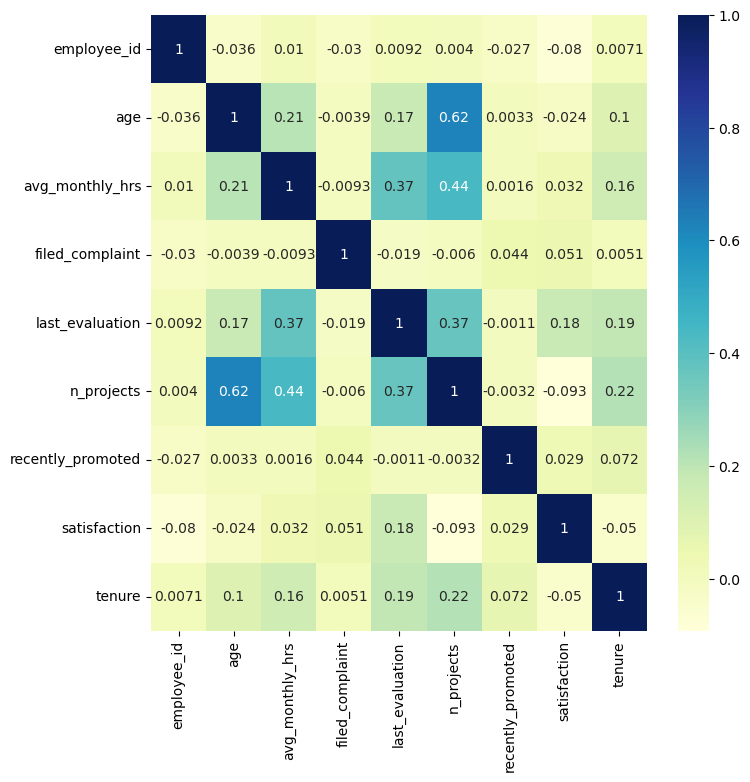

In [47]:
plt.figure(figsize=(8,8))

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

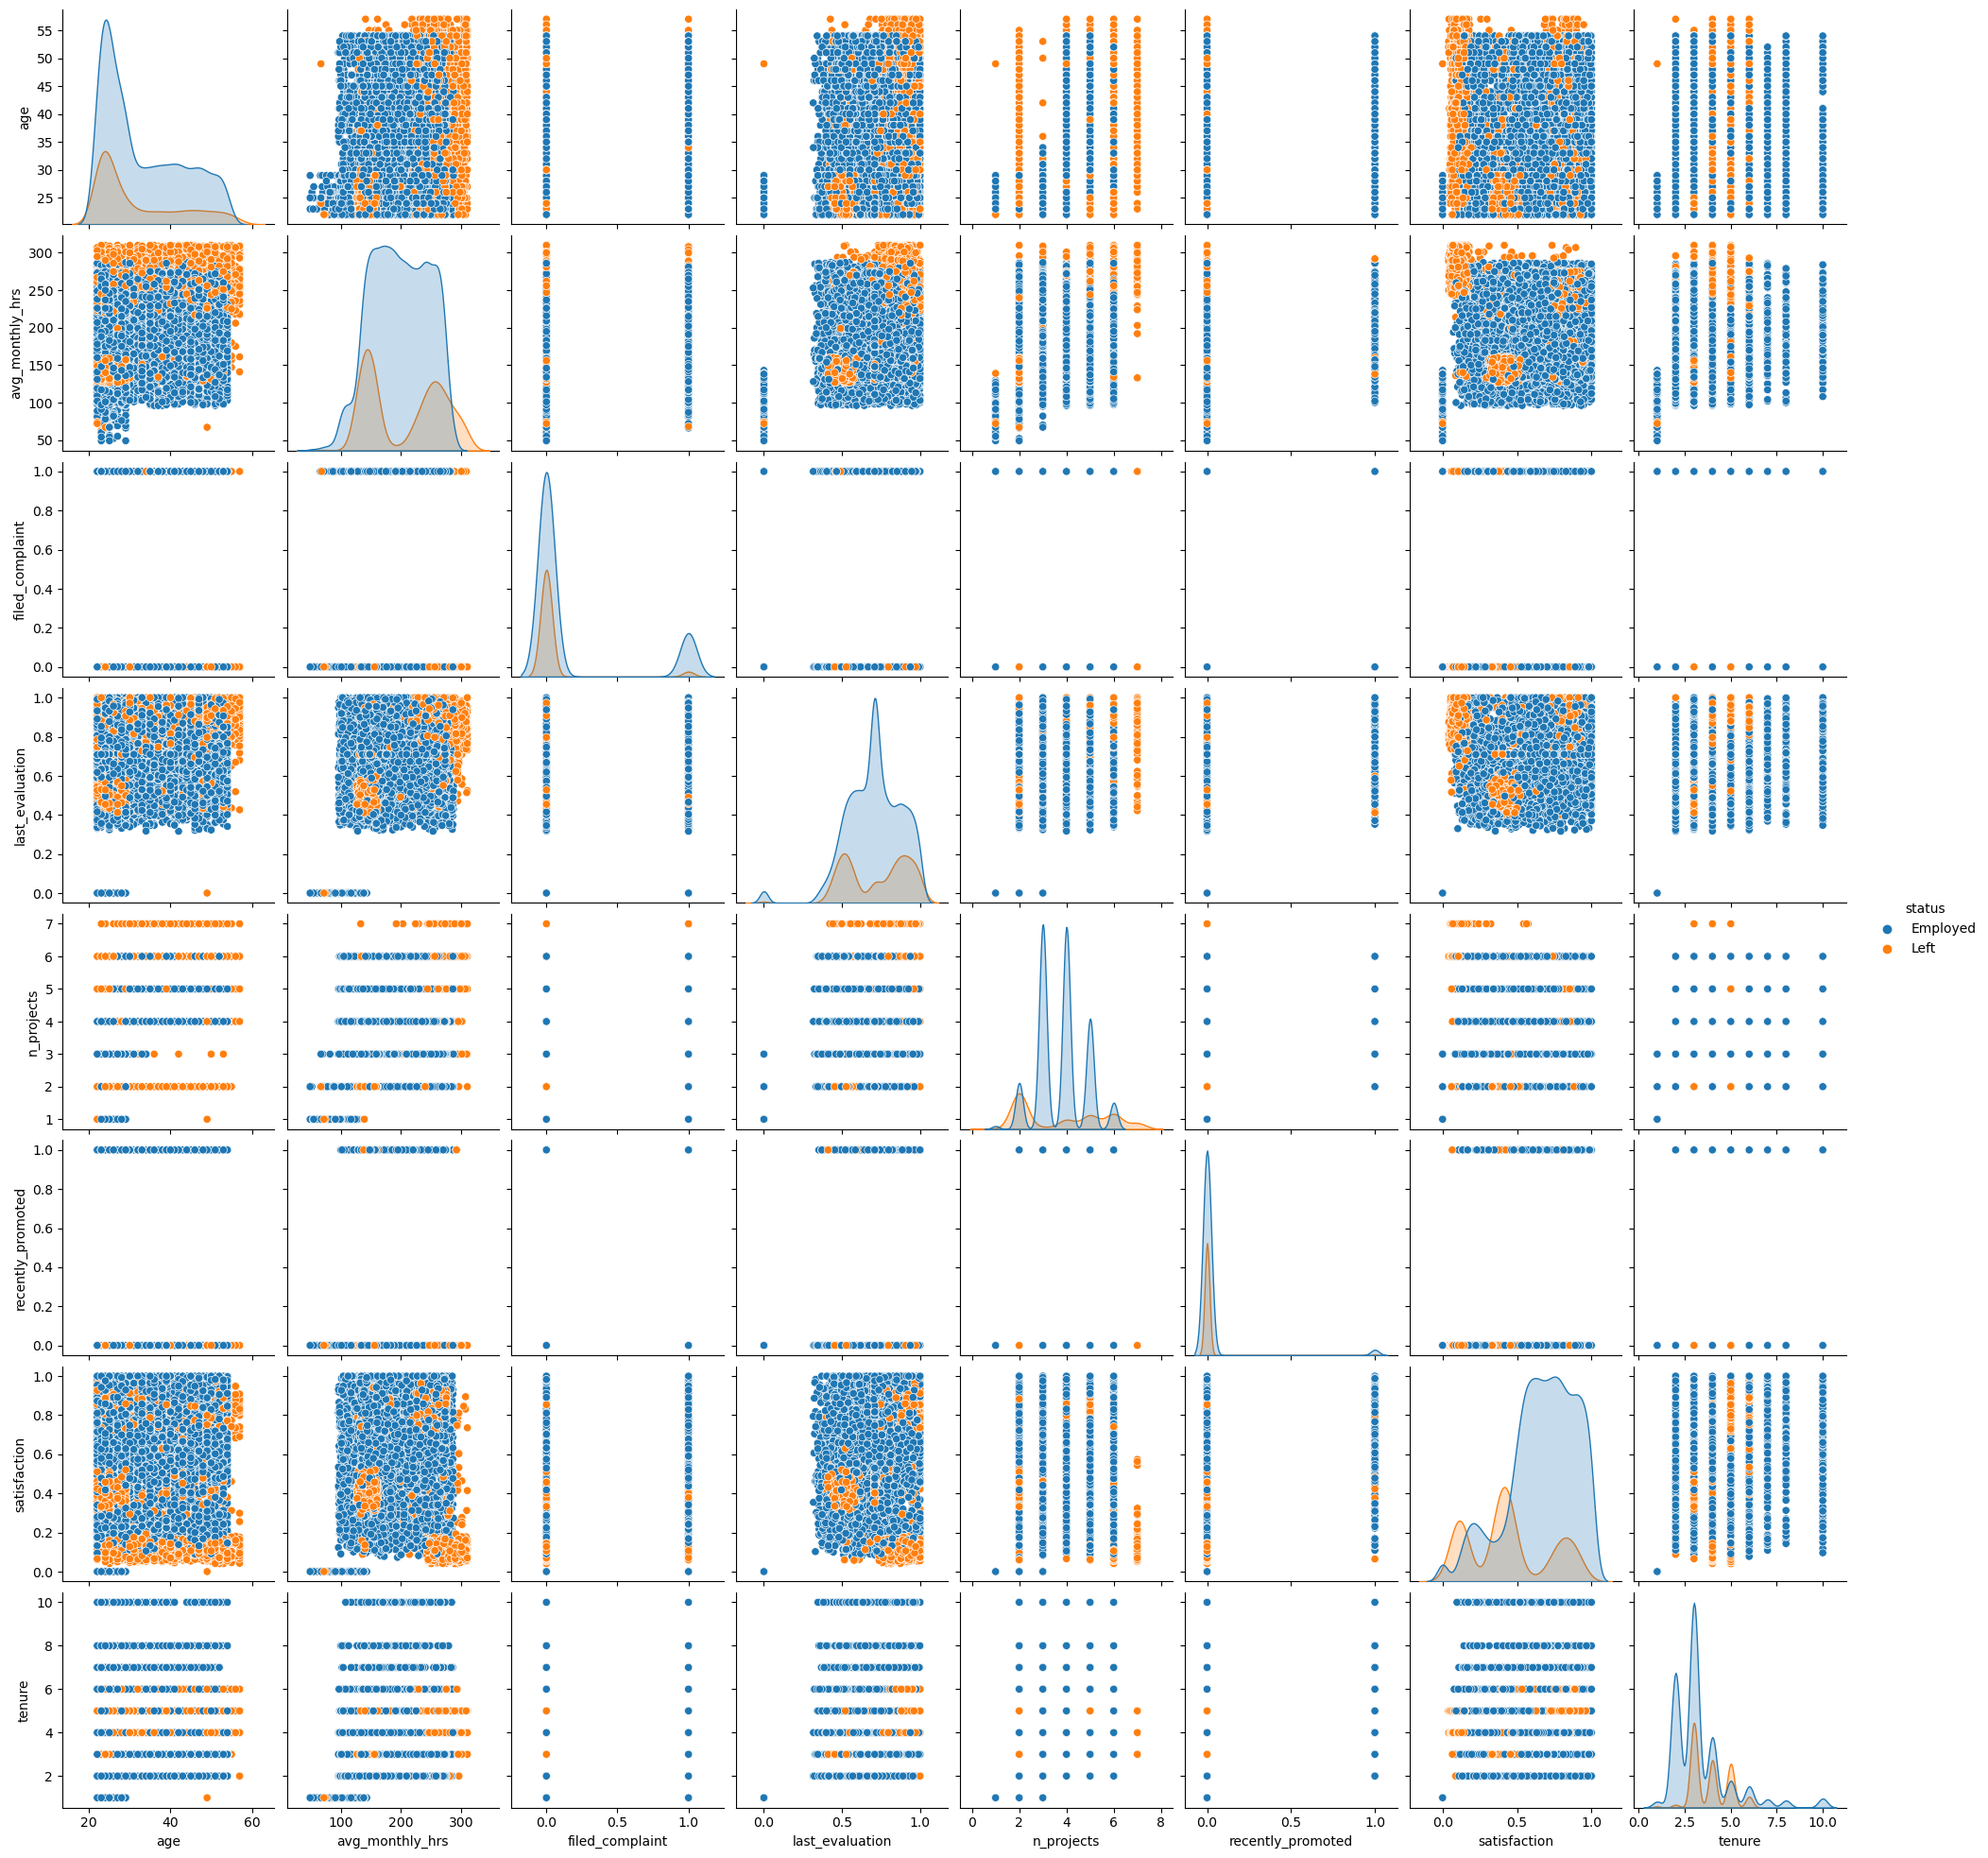

In [48]:
sns.pairplot(df.drop('employee_id', axis=1),hue='status')

In [49]:
df.describe(include='all')

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,14116.000000,14116.000000,14116,14116,14116.000000,14116,14116.000000,14116.000000,14116.000000,14116.000000,14116,14116.000000,14116,14116.000000
unique,NaN,NaN,2,2,NaN,11,NaN,NaN,NaN,NaN,3,NaN,2,NaN
top,NaN,NaN,Male,Unmarried,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN
freq,NaN,NaN,9287,7211,NaN,4601,NaN,NaN,NaN,NaN,6889,NaN,10761,NaN
mean,112120.657764,32.896005,NaN,NaN,199.992632,NaN,0.144588,0.709890,3.777770,0.021040,NaN,0.614719,NaN,3.471167
std,8497.639403,9.975000,NaN,NaN,50.826952,NaN,0.351697,0.179490,1.249693,0.143523,NaN,0.257143,NaN,1.475056
min,100101.000000,22.000000,NaN,NaN,49.000000,NaN,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,NaN,1.000000
25%,105773.500000,24.000000,NaN,NaN,155.000000,NaN,0.000000,0.572738,3.000000,0.000000,NaN,0.442808,NaN,3.000000
50%,111293.500000,29.000000,NaN,NaN,199.000000,NaN,0.000000,0.709890,4.000000,0.000000,NaN,0.648350,NaN,3.000000
75%,116655.250000,41.000000,NaN,NaN,245.000000,NaN,0.000000,0.856854,5.000000,0.000000,NaN,0.822960,NaN,4.000000


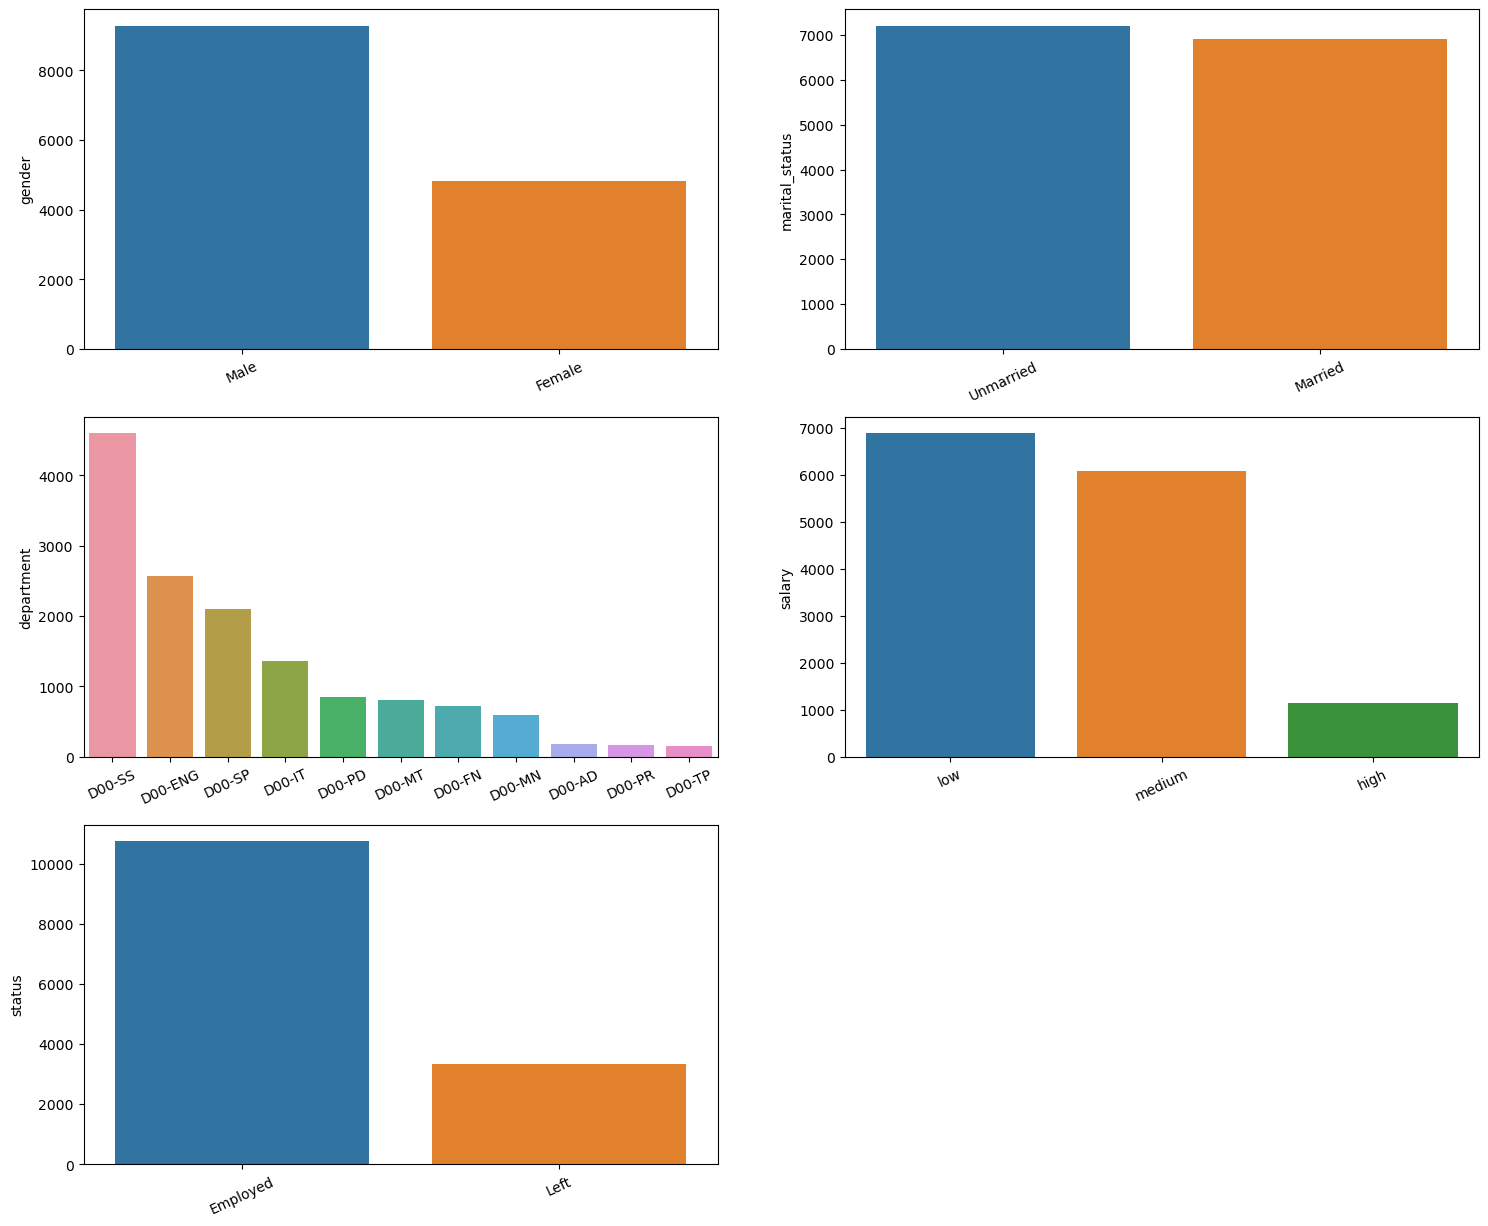

In [50]:
# lets check the distribution of categorical variables in the df dataframe

obj=(df.dtypes=='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(18,15))
index=1

for col in object_cols:
    y = df[col].value_counts(dropna=False)
    plt.subplot(3,2,index)
    plt.xticks(rotation=25)
    sns.barplot(x=list(y.index),y=y)
    index+=1

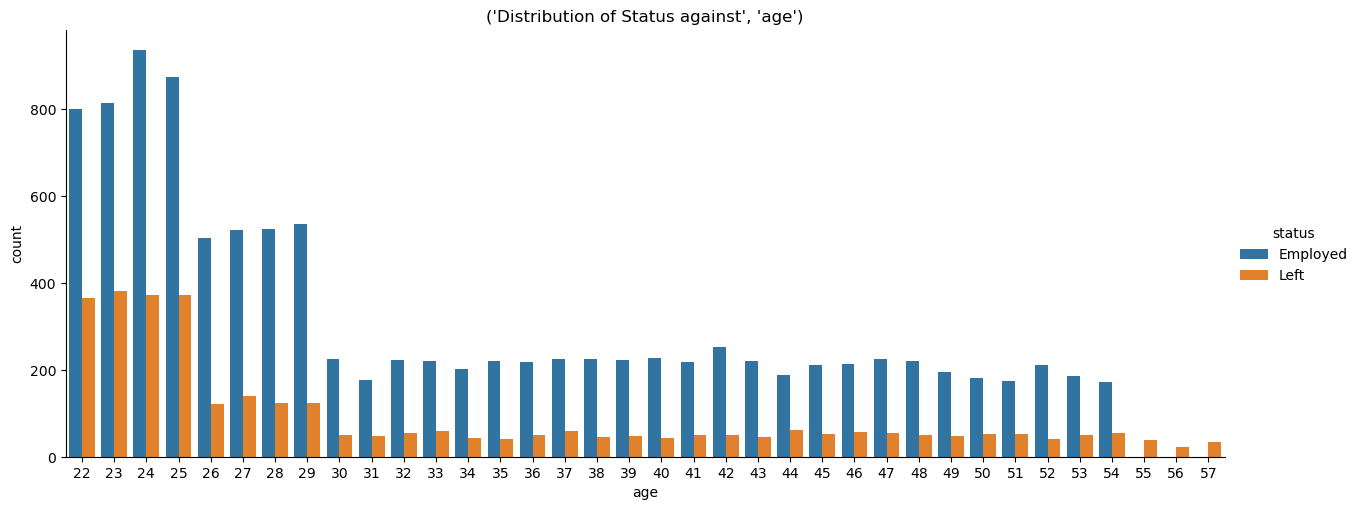

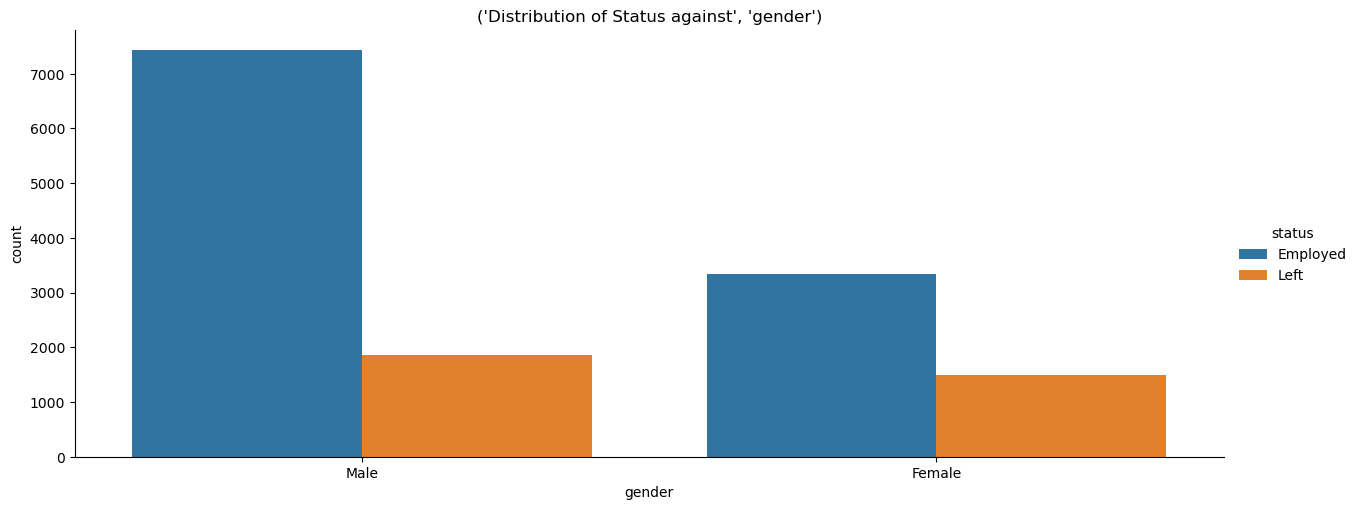

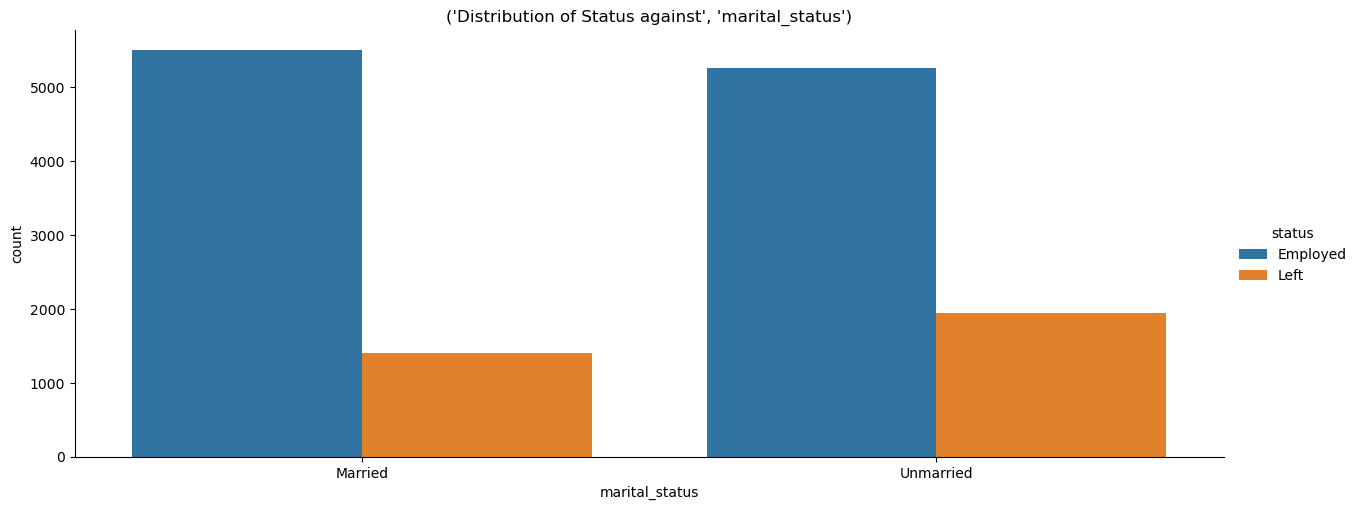

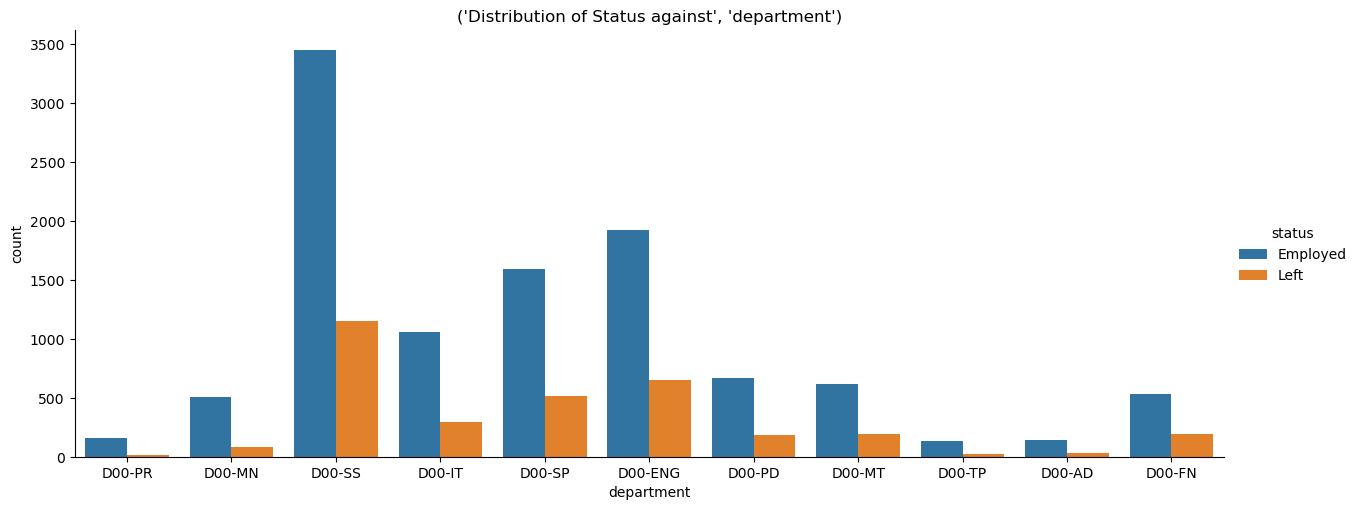

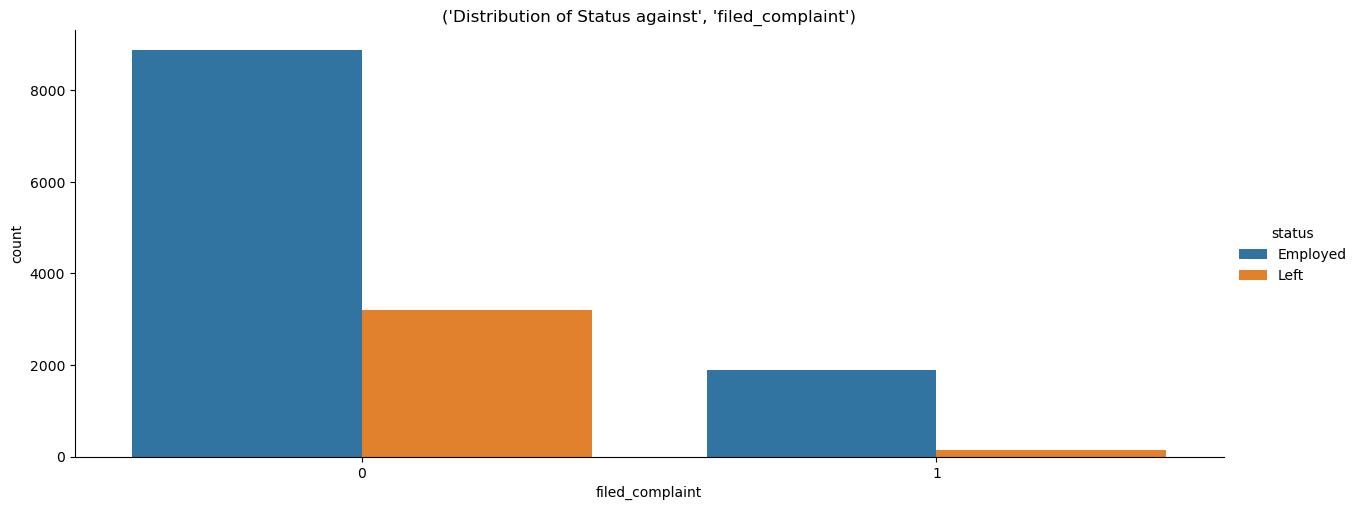

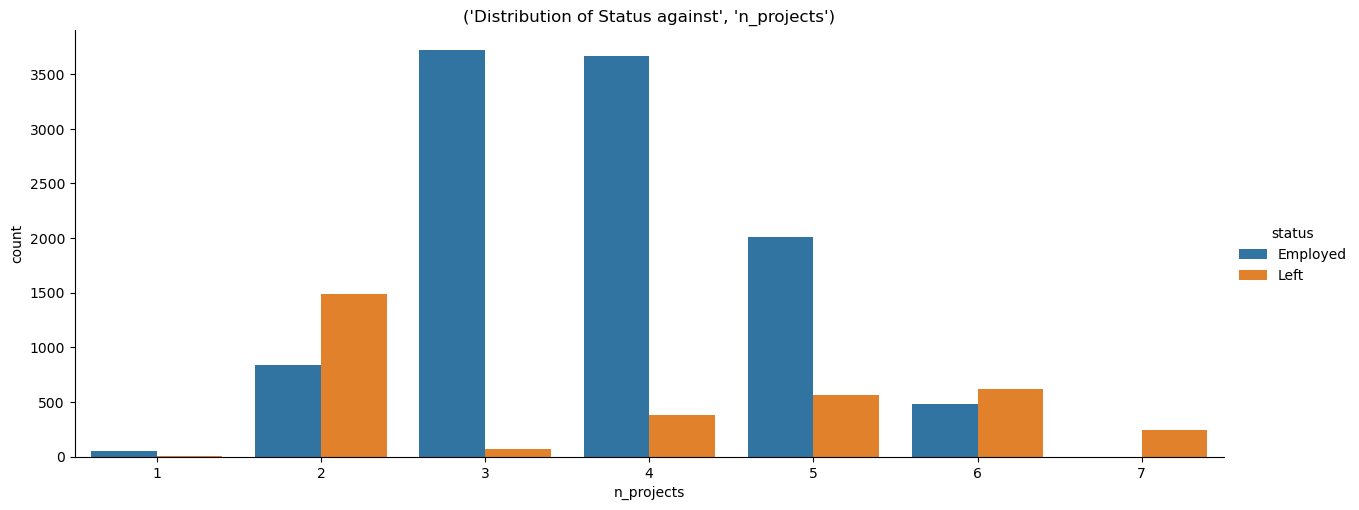

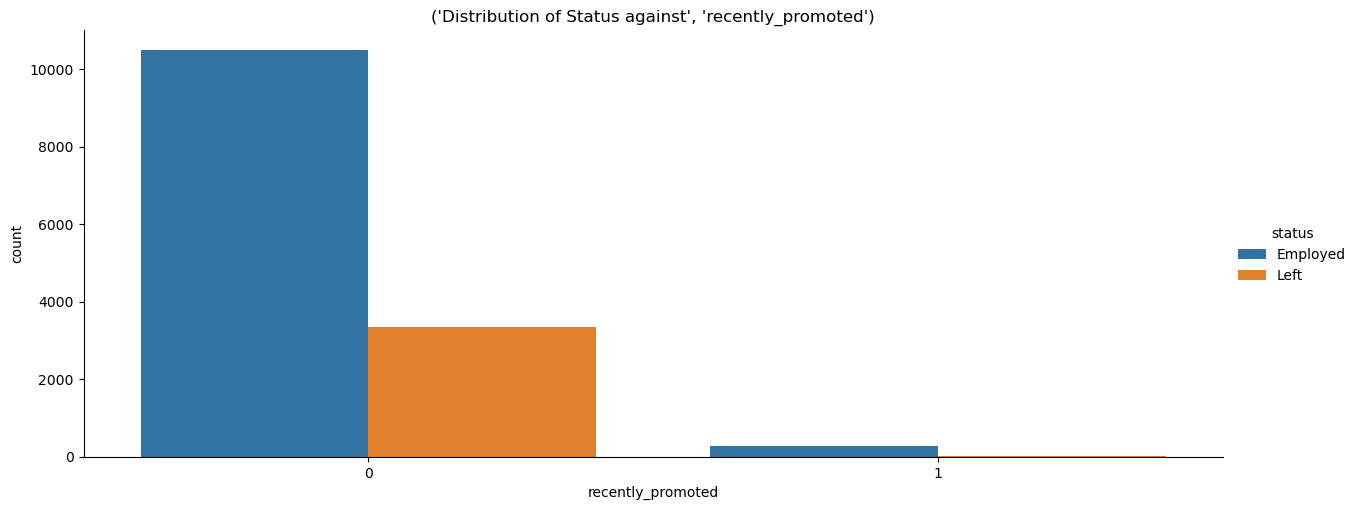

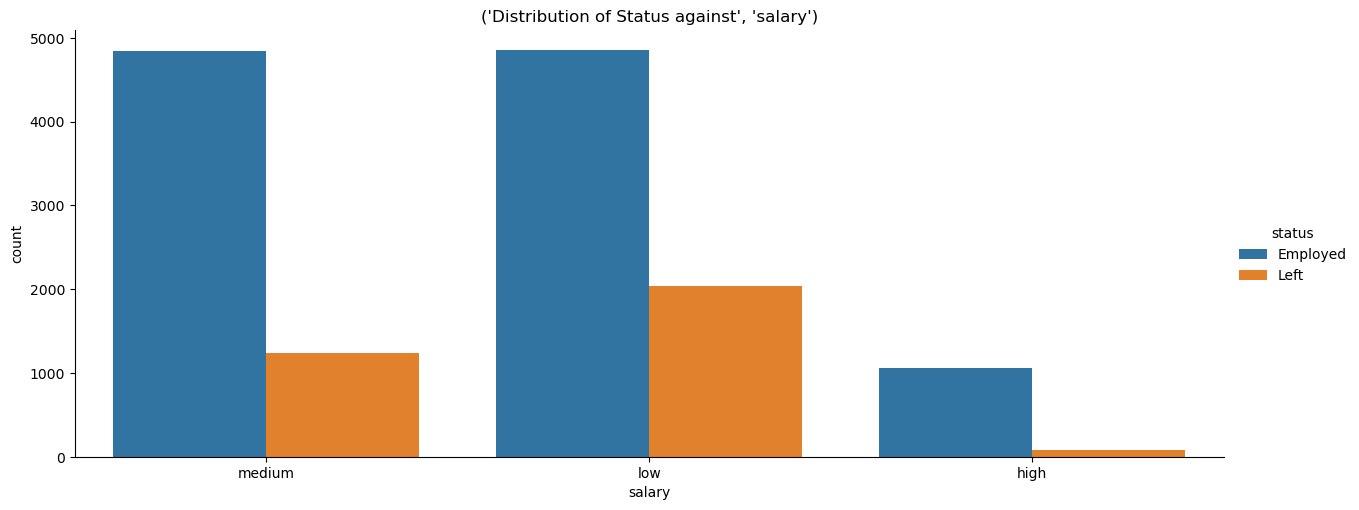

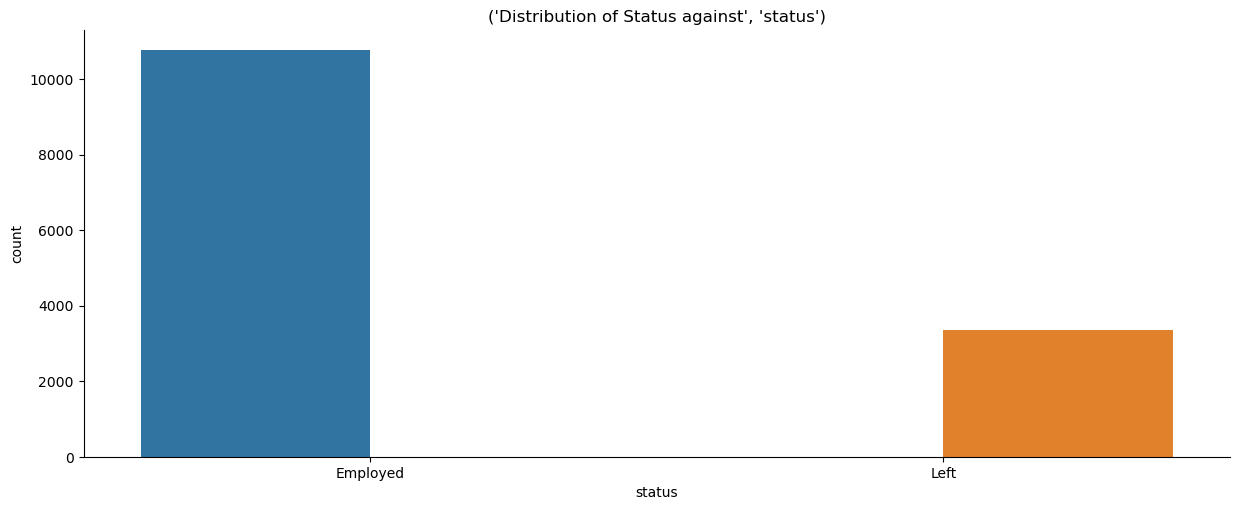

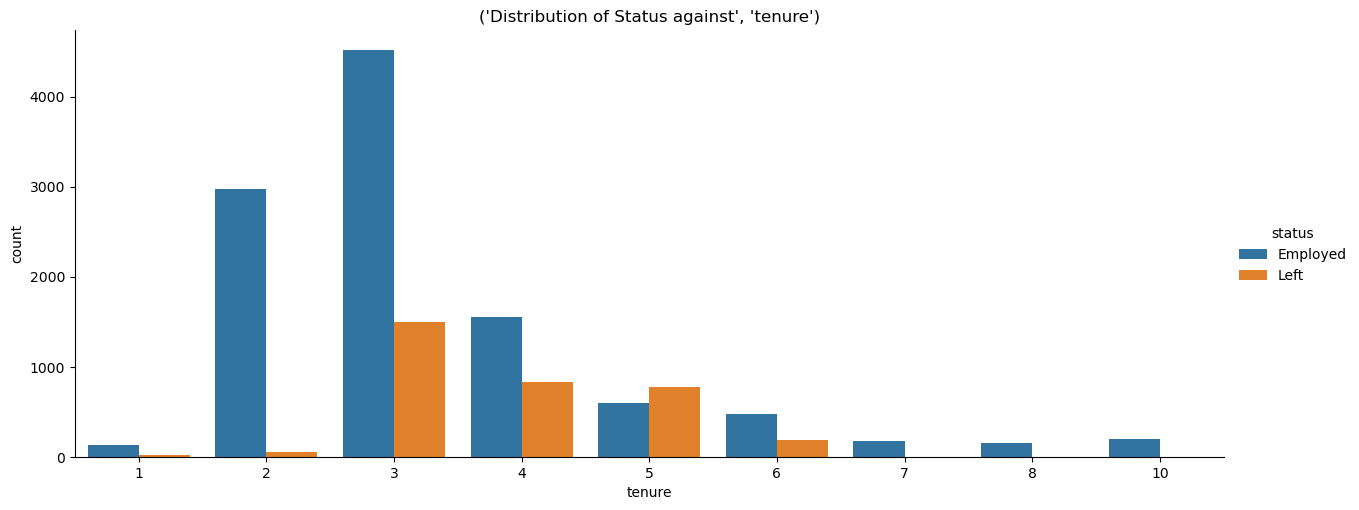

In [51]:
# lets check relation between all the independent feature with dependent in df dataframe

features=df.drop(['employee_id','avg_monthly_hrs','last_evaluation','satisfaction'],axis=1)

for feature in features:
    t=('Distribution of Status against', feature)
    sns.catplot(hue='status', data=df, kind='count', x=feature, height=5, aspect=2.5)
    plt.title(t)

<AxesSubplot:xlabel='avg_monthly_hrs', ylabel='Count'>

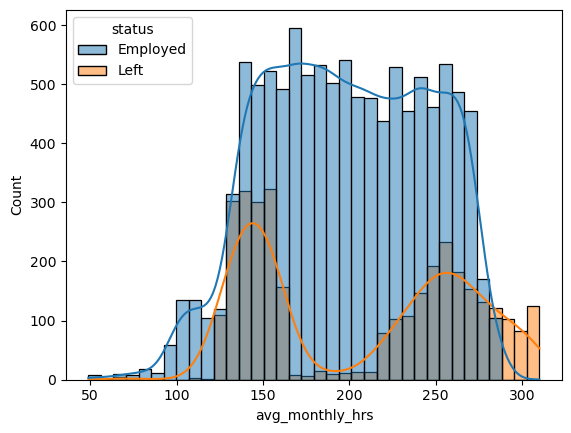

In [52]:
sns.histplot(data=df, x='avg_monthly_hrs',kde=True, hue='status')

<AxesSubplot:xlabel='last_evaluation', ylabel='Count'>

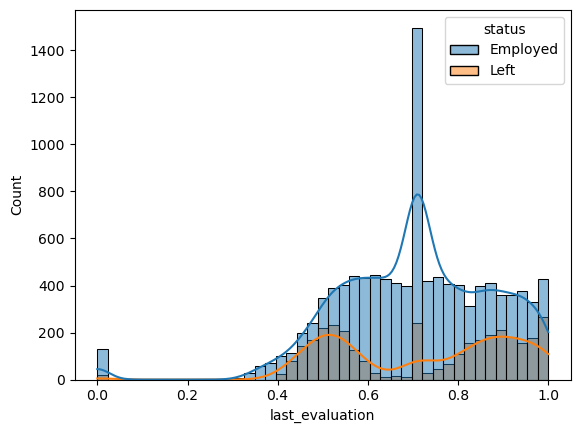

In [53]:
sns.histplot(data=df, x='last_evaluation', kde=True, hue='status')

<AxesSubplot:xlabel='satisfaction', ylabel='Count'>

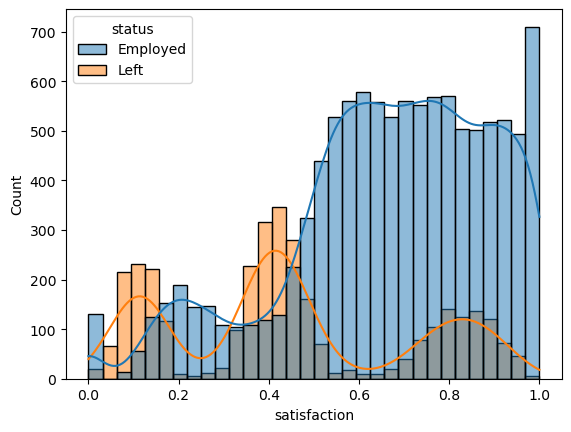

In [54]:
sns.histplot(data=df, x='satisfaction', kde=True, hue='status')

<AxesSubplot:xlabel='age', ylabel='Count'>

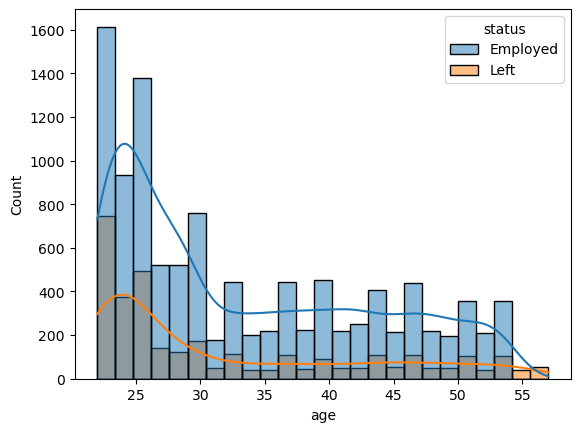

In [55]:
sns.histplot(data=df, x='age', kde=True, hue='status')

<AxesSubplot:xlabel='department', ylabel='Count'>

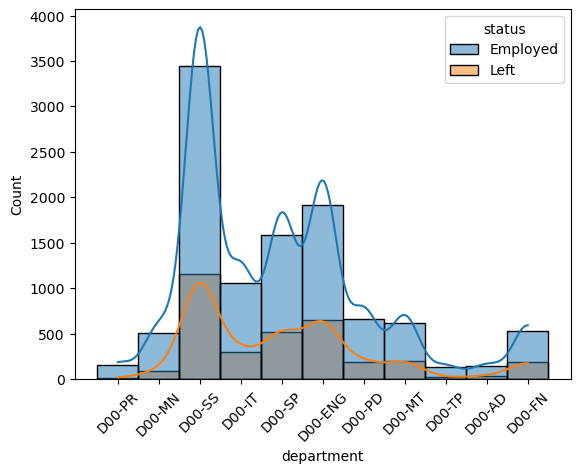

In [56]:
plt.xticks(rotation=45)
sns.histplot(data=df, x='department', kde=True, hue='status')

<AxesSubplot:xlabel='recently_promoted', ylabel='Count'>

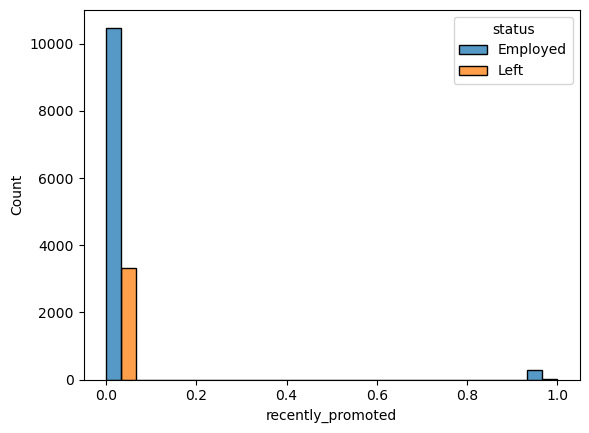

In [57]:
sns.histplot(data=df,x='recently_promoted',hue='status', multiple='dodge')

<AxesSubplot:xlabel='tenure', ylabel='Percent'>

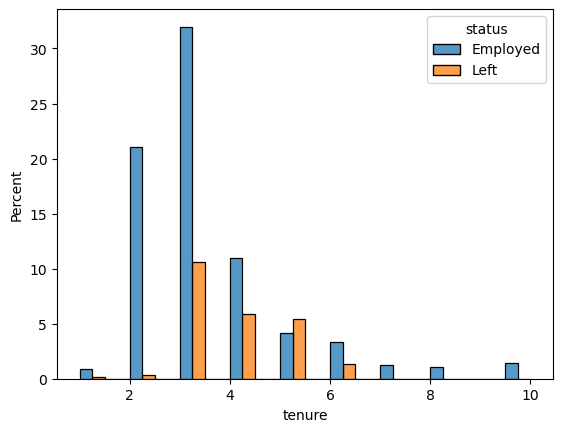

In [58]:
sns.histplot(data=df,x='tenure',hue='status', multiple='dodge', stat='percent', binwidth=.5)

<AxesSubplot:xlabel='tenure', ylabel='age'>

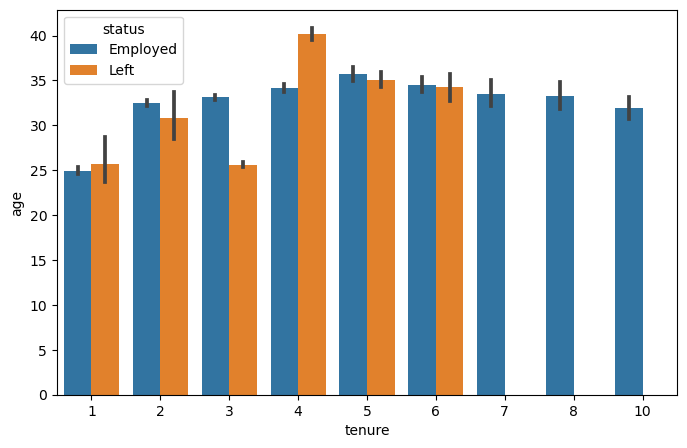

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, y='age', x='tenure', hue='status', orient='v')

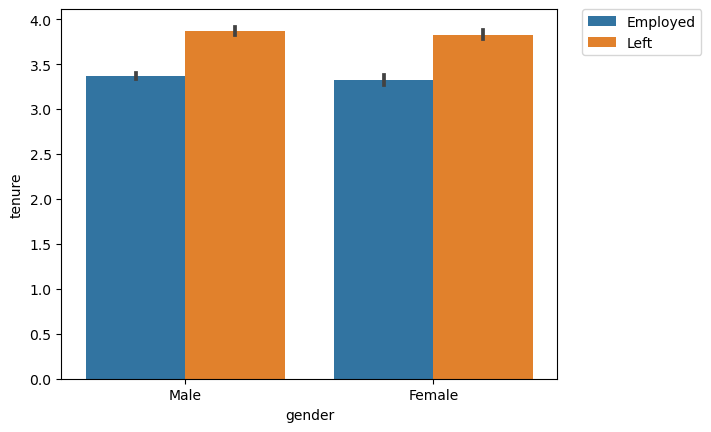

In [60]:
# plt.figure(figsize=(8,5))
sns.barplot(data=df, x='gender', y='tenure', hue='status')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

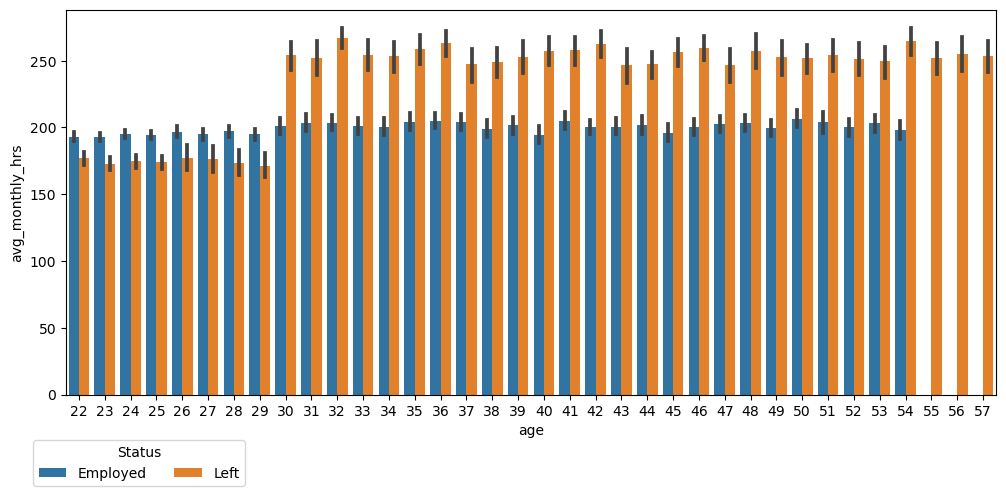

In [61]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='age', y='avg_monthly_hrs', hue='status')
plt.legend(loc='best', bbox_to_anchor=(0.2, -0.1), ncol=2, title="Status")

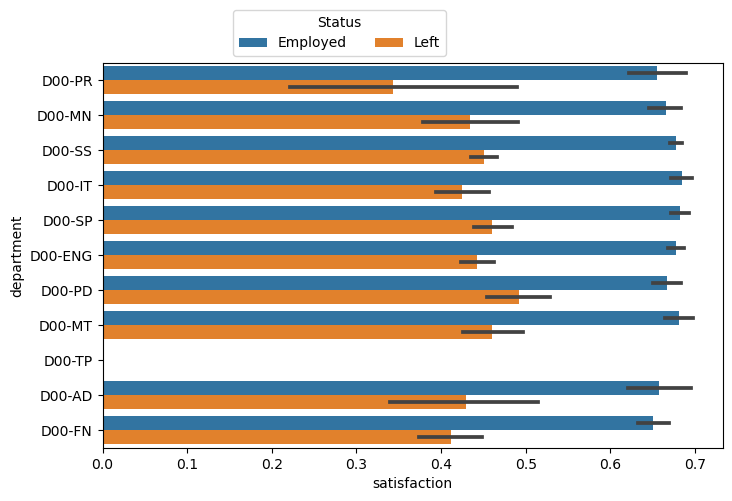

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='satisfaction', y='department', hue='status')
plt.legend(loc='best', bbox_to_anchor=(0.2, 1), ncol=2, title="Status")

<div class="alert alert-block alert-danger" >
    
<span style='background:yellow'><b>Observations:</b></span><br>
- Employees who had worked more than 200 hours, seem left the organisation.
- The gender, Promotions has no impact on employement.
- We can observe most of the employees age bracket is between 22-30 who left the organisation.
- Most of the employees feel satisfied in the company across the Departement except Temporary where there was no data available.
- Employees whose salary bracket is either 'low' or 'medium' are left the oraginsation.    

---
<a name = Section8></a>
# <font color=blue>**8 Training the Model**</font>
---

In [63]:
print(df.shape)
df.head()

(14116, 14)


,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,0,0.753977,5,1,medium,0.921208,Employed,4
1,112256,24,Female,Unmarried,201.0,D00-MN,0,0.964453,3,0,medium,0.568479,Employed,3
2,112586,22,Female,Unmarried,239.0,D00-SS,0,0.756458,3,0,low,0.144812,Employed,6
3,108071,36,Male,Married,151.0,D00-PR,0,0.608282,5,0,medium,0.210300,Employed,6
4,116915,38,Male,Married,259.0,D00-IT,0,0.749206,4,0,medium,0.888514,Employed,3


In [64]:
df_cleaned= df.copy()

In [65]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14115
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        14116 non-null  int64  
 1   age                14116 non-null  int64  
 2   gender             14116 non-null  object 
 3   marital_status     14116 non-null  object 
 4   avg_monthly_hrs    14116 non-null  float64
 5   department         14116 non-null  object 
 6   filed_complaint    14116 non-null  int64  
 7   last_evaluation    14116 non-null  float64
 8   n_projects         14116 non-null  int64  
 9   recently_promoted  14116 non-null  int64  
 10  salary             14116 non-null  object 
 11  satisfaction       14116 non-null  float64
 12  status             14116 non-null  object 
 13  tenure             14116 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


In [66]:
df_cleaned.status.value_counts()

Employed    10761
Left         3355
Name: status, dtype: int64

In [67]:
# change the target feature - 'Employed' as 0 and 'Left' as 1

df_cleaned['status']= df_cleaned['status'].replace({'Employed': 0, 'Left': 1})

df_cleaned.status.value_counts()

0    10761
1     3355
Name: status, dtype: int64

In [68]:
df_cleaned.head()

,employee_id,age,gender,marital_status,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,113558,43,Male,Married,111.0,D00-PR,0,0.753977,5,1,medium,0.921208,0,4
1,112256,24,Female,Unmarried,201.0,D00-MN,0,0.964453,3,0,medium,0.568479,0,3
2,112586,22,Female,Unmarried,239.0,D00-SS,0,0.756458,3,0,low,0.144812,0,6
3,108071,36,Male,Married,151.0,D00-PR,0,0.608282,5,0,medium,0.210300,0,6
4,116915,38,Male,Married,259.0,D00-IT,0,0.749206,4,0,medium,0.888514,0,3


In [69]:
df_cleaned.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'avg_monthly_hrs',
       'department', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'salary', 'satisfaction', 'status', 'tenure'],
      dtype='object')

In [70]:
# assigned dependent & independent variables

X=df_cleaned.drop(['employee_id', 'age', 'gender', 'marital_status','status'], axis=1)
y=df_cleaned['status']

In [71]:
# Train & Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25, stratify=y)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10587, 9)
(3529, 9)
(10587,)
(3529,)


<b> <font size=4>1. Let See the relationship between satisfaction & Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: satisfaction and status is independent <br>
2. Alternate Hypothesis: satisfaction and status is dependent

In [73]:
from scipy.stats.contingency import chi2_contingency

In [74]:
def chi_sq_test(x, y):
  table = pd.crosstab(x,y)
  _,p,_,_ = chi2_contingency(table)
  if p < 0.05:
    print('Reject the Null Hypothesis at p: ', round(p,2))
  else:
    print('Failed to Reject the null hypothesis at p: ', round(p,2))
  return table

In [75]:
chi_sq_test(X['satisfaction'],y)

Reject the Null Hypothesis at p:  0.0


status,0,1
satisfaction,,
0.000000,130,20
0.040058,0,1
0.040191,0,1
0.040477,0,1
0.041302,0,1
...,...,...
0.999593,1,0
0.999704,1,0
0.999763,1,0


<b> <font size=4>2. Let See the relationship between Last_evaluation & Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: Last_evaluation and status is independent
2. Alternate Hypothesis: Last_evaluation and status is dependent

In [76]:
chi_sq_test(X['last_evaluation'],y)

Failed to Reject the null hypothesis at p:  0.08


status,0,1
last_evaluation,,
0.000000,130,20
0.316175,1,0
0.317279,1,0
0.320953,1,0
0.322828,1,0
...,...,...
0.999259,1,0
0.999365,1,0
0.999390,1,0


<b> <font size=4>3. Let See the relationship between filed_complaint & Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: filed_complaint and Loan status is independent
2. Alternate Hypothesis: filed_complaint and Loan status is dependent

In [77]:
chi_sq_test(X['filed_complaint'],y)

Reject the Null Hypothesis at p:  0.0


status,0,1
filed_complaint,,
0,8872,3203
1,1889,152


<b> <font size=4>4. Let See the relationship between recently_promoted & Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: recently_promoted and status is independent
2. Alternate Hypothesis: recently_promoted and status is dependent

In [78]:
chi_sq_test(X['recently_promoted'],y)

Reject the Null Hypothesis at p:  0.0


status,0,1
recently_promoted,,
0,10482,3337
1,279,18


<b> <font size=4>5. Let See the relationship between Salary & Status by using Chi-Square Test</font></b><br>

1. Null Hypothesis: salary and Loan status is independent
2. Alternate Hypothesis: salary and Loan status is dependent

In [79]:
chi_sq_test(X['salary'],y)

Reject the Null Hypothesis at p:  0.0


status,0,1
salary,,
high,1064,77
low,4851,2038
medium,4846,1240


---
<a name = Section81></a>
# <font color=blue>**8.1 Best Model Selection using Pipeline**</font>
---

In [80]:
# filling the null values for numerical features and scaling with standard scaler

num_values = Pipeline(steps=[('scaler', StandardScaler())])

# filling the null values for categorical features and encoding with OneHot Encoder

cat_values = Pipeline(steps=[("onehot", OneHotEncoder(drop='first',handle_unknown="ignore"))])

In [81]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [82]:
num_features = X.select_dtypes(exclude=['object']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_values, num_features),
        ('cat', cat_values, cat_features)])

In [111]:
# Classification - Model Pipeline

log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


clfs = [
    ('Logistic Regression', log_reg), 
    ('K-Nearest Neighbors', knn), 
    ('SVM', svm), 
    ('Decision Tree', dt), 
    ('Random Forest', rf)]

In [84]:
import sklearn.metrics as skm

In [112]:
pipelines = []

scores_train = pd.DataFrame(columns=['train_Model', 'train_F1_Score', 'train_Precision', 'train_Recall', 'train_Accuracy'])
scores_test = pd.DataFrame(columns=['test_Model', 'test_F1_Score', 'test_Precision', 'test_Recall', 'test_Accuracy'])
    
for clf_name, clf in clfs:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)])
    
    pipeline.fit(X_train, y_train)

    # Train data
        
    y_train_pred = pipeline.predict(X_train)
    # F1-Score
    fscore_train = skm.f1_score(y_train, y_train_pred,pos_label=1)*100
    # Precision
    pres_train = skm.precision_score(y_train, y_train_pred,pos_label=1)*100
    # Recall
    rcall_train = skm.recall_score(y_train, y_train_pred,pos_label=0)*100
    # Accuracy
    accu_train = skm.accuracy_score(y_train, y_train_pred)*100

    # Test data
        
    y_test_pred = pipeline.predict(X_test)
    # F1-Score
    fscore_test = skm.f1_score(y_test, y_test_pred,pos_label=1)*100
    # Precision
    pres_test = skm.precision_score(y_test, y_test_pred,pos_label=1)*100
    # Recall
    rcall_test = skm.recall_score(y_test, y_test_pred,pos_label=0)*100
    # Accuracy
    accu_test = skm.accuracy_score(y_test, y_test_pred)*100
    pipelines.append(pipeline)
    
    scores_train = scores_train.append({
        'train_Model' : clf_name,
        'train_F1_Score' : fscore_train,
        'train_Precision' : pres_train,
        'train_Recall' : rcall_train,
        'train_Accuracy' : accu_train},
        ignore_index=True)
    
    scores_test = scores_test.append({
        'test_Model' : clf_name, 
        'test_F1_Score' : fscore_test,
        'test_Precision' : pres_test,
        'test_Recall' : rcall_test,
        'test_Accuracy' : accu_test},
        ignore_index=True)

In [113]:
scores_train

,train_Model,train_F1_Score,train_Precision,train_Recall,train_Accuracy
0,Logistic Regression,41.664539,58.244111,92.751828,78.416926
1,K-Nearest Neighbors,91.274644,89.681626,96.667080,95.777841
2,SVM,91.519293,92.560976,97.732623,96.013979
3,Decision Tree,99.960239,100.000000,100.000000,99.981109
4,Random Forest,99.940346,100.000000,100.000000,99.971663


In [114]:
scores_test

,test_Model,test_F1_Score,test_Precision,test_Recall,test_Accuracy
0,Logistic Regression,41.903300,58.836207,92.899628,78.549164
1,K-Nearest Neighbors,89.349112,88.719154,96.431227,94.899405
2,SVM,91.346154,92.121212,97.583643,95.919524
3,Decision Tree,91.381346,90.526316,96.988848,95.862851
4,Random Forest,95.599022,98.117942,99.442379,97.959762


In [115]:
pipeline.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['department', 'salary'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])>

---
<a name = Section9></a>
# <font color=blue>**9. Apply the trained model on unseen Data**</font>
---

In [116]:
# import the data for prediction

unseen_data= pd.read_csv(r"C:\Users\Mahesh\Downloads\GCD_Capstone_Project_unseen_data - GCD_Capstone_Project_unseen_data.csv")
print(unseen_data.shape)
unseen_data.head()

(100, 10)


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,NaN,0.528841,2,NaN,low,0.400464,3.0,119045
1,221,D00-PD,NaN,0.784561,2,NaN,low,0.759513,3.0,112223
2,156,D00-SS,NaN,0.545183,2,NaN,medium,0.336457,3.0,103924
3,133,D00-PR,NaN,NaN,4,NaN,medium,0.832039,2.0,105922
4,135,D00-SS,NaN,0.454637,2,NaN,low,0.320723,5.0,103297


In [117]:
unseen_data.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      17
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                3
employee_id           0
dtype: int64

In [118]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         98 non-null     object 
 2   filed_complaint    15 non-null     float64
 3   last_evaluation    83 non-null     float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  3 non-null      float64
 6   salary             100 non-null    object 
 7   satisfaction       97 non-null     float64
 8   tenure             97 non-null     float64
 9   employee_id        100 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.9+ KB


In [119]:
unseen_data.describe(include = 'all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
count,100.000000,98,15.0,83.000000,100.000000,3.0,100,97.000000,97.000000,100.000000
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN
freq,NaN,27,NaN,NaN,NaN,NaN,45,NaN,NaN,NaN
mean,198.810000,NaN,1.0,0.744114,3.760000,1.0,NaN,0.629632,3.422680,112515.750000
std,53.185723,NaN,0.0,0.169536,1.349298,0.0,NaN,0.246901,1.566811,9466.676715
min,68.000000,NaN,1.0,0.396801,1.000000,1.0,NaN,0.051515,2.000000,100230.000000
25%,154.500000,NaN,1.0,0.576181,3.000000,1.0,NaN,0.477002,2.000000,105855.000000
50%,206.000000,NaN,1.0,0.748131,4.000000,1.0,NaN,0.660827,3.000000,110557.000000
75%,247.500000,NaN,1.0,0.901458,5.000000,1.0,NaN,0.832039,4.000000,117130.250000


In [120]:
# Replaced all '-IT' values with 'D00-IT' as they represent the same department
unseen_data['department']=np.where(unseen_data['department']=='-IT', 'D00-IT', unseen_data['department'])

# For the department D00-TP, we are assumimg that last_evalution should be 0 and max tenure is 1 year
unseen_data['last_evaluation']=np.where(unseen_data['department']=='D00-TP', 0.00, unseen_data['last_evaluation'])

unseen_data['tenure']=np.where(unseen_data['department']=='D00-TP', 1.0, unseen_data['tenure'])

In [121]:
unseen_data.isnull().sum()

avg_monthly_hrs       0
department            2
filed_complaint      85
last_evaluation      14
n_projects            0
recently_promoted    97
salary                0
satisfaction          3
tenure                0
employee_id           0
dtype: int64

In [122]:
# replacing all NaN values in the columns:filed_complaint, recently_promoted and satisfaction with the value '0'.
unseen_data['filed_complaint']=np.where(unseen_data['filed_complaint'].isnull(), 0.0, unseen_data['filed_complaint'])
unseen_data['recently_promoted']=np.where(unseen_data['recently_promoted'].isnull(), 0.0, unseen_data['recently_promoted'])
unseen_data['satisfaction']=np.where(unseen_data['satisfaction'].isnull(), 0.0, unseen_data['satisfaction'])

In [123]:
np.where(unseen_data['satisfaction'].isnull(), 0, unseen_data['satisfaction'])

array([0.40046401, 0.75951316, 0.33645731, 0.83203889, 0.32072319,
       0.81048271, 0.6114116 , 0.44555637, 0.53433566, 0.94908605,
       0.11605446, 0.11558622, 0.45430711, 0.80666255, 0.59828509,
       0.97577521, 0.46813218, 0.57782027, 0.76893745, 0.90061983,
       0.84774065, 0.35733948, 0.        , 0.80215534, 0.39882744,
       0.79599787, 0.64272294, 0.83128921, 0.73494446, 0.49955846,
       0.53241926, 0.7117824 , 0.85576569, 1.        , 0.75149521,
       0.53921386, 0.48521298, 0.07820633, 0.55410218, 0.9077345 ,
       0.05558326, 0.80031423, 0.53432313, 0.55797567, 0.71205469,
       0.88181273, 0.40452143, 0.59332618, 0.54016747, 0.57533605,
       0.95240192, 0.68252825, 0.61302714, 1.        , 0.17933823,
       0.85016474, 0.63255115, 0.86474794, 0.8334442 , 0.73472529,
       0.        , 0.44559067, 0.40284715, 0.77022584, 0.0515151 ,
       0.16773153, 0.92144494, 0.1535755 , 0.99158131, 0.87286899,
       0.49525049, 0.89027135, 0.73759886, 0.77045151, 0.49052

In [124]:
# Replacing all the Null department values with the mode : D00-SS department
unseen_data['department']=np.where(unseen_data['department'].isnull(), 'D00-SS', unseen_data['department'])

In [125]:
unseen_data.isnull().sum()

avg_monthly_hrs       0
department            0
filed_complaint       0
last_evaluation      14
n_projects            0
recently_promoted     0
salary                0
satisfaction          0
tenure                0
employee_id           0
dtype: int64

In [126]:
unseen_data['last_evaluation']=np.where(unseen_data['last_evaluation'].isnull(), 0.00, unseen_data['last_evaluation'])

In [127]:
unseen_data.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
tenure               0
employee_id          0
dtype: int64

In [128]:
# change datatype of filed_complaint, satisfaction, recently_promoted and tenure

unseen_data['filed_complaint']=unseen_data['filed_complaint'].astype('float64')
unseen_data['filed_complaint']=unseen_data['filed_complaint'].astype('int64')
print(unseen_data['filed_complaint'].unique())
print("-"*10)

unseen_data['recently_promoted']=unseen_data['recently_promoted'].astype('float64')
unseen_data['recently_promoted']=unseen_data['recently_promoted'].astype('int64')
print(unseen_data['recently_promoted'].unique())
print("-"*10)

unseen_data['tenure']=unseen_data['tenure'].astype('float64')
unseen_data['tenure']=unseen_data['tenure'].astype('int64')
print(unseen_data['tenure'].unique())

[0 1]
----------
[0 1]
----------
[ 3  2  5  6  4 10  7  1]


In [129]:
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    100 non-null    int64  
 1   department         100 non-null    object 
 2   filed_complaint    100 non-null    int64  
 3   last_evaluation    100 non-null    float64
 4   n_projects         100 non-null    int64  
 5   recently_promoted  100 non-null    int64  
 6   salary             100 non-null    object 
 7   satisfaction       100 non-null    float64
 8   tenure             100 non-null    int64  
 9   employee_id        100 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 7.9+ KB


In [130]:
unseen_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id
0,134,D00-IT,0,0.528841,2,0,low,0.400464,3,119045
1,221,D00-PD,0,0.784561,2,0,low,0.759513,3,112223
2,156,D00-SS,0,0.545183,2,0,medium,0.336457,3,103924
3,133,D00-PR,0,0.000000,4,0,medium,0.832039,2,105922
4,135,D00-SS,0,0.454637,2,0,low,0.320723,5,103297


In [131]:
pipeline.predict_proba(unseen_data)

array([[0.  , 1.  ],
       [0.91, 0.09],
       [0.04, 0.96],
       [0.93, 0.07],
       [0.38, 0.62],
       [1.  , 0.  ],
       [0.82, 0.18],
       [0.94, 0.06],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.  , 1.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.37, 0.63],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.94, 0.06],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.96, 0.04],
       [0.  , 1.  ],
       [0.56, 0.44],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.  , 1.  ],
       [0.98,

In [133]:
pipeline.classes_

array([0, 1], dtype=int64)

In [132]:
unseen_data_predict_prob = pipeline.predict_proba(unseen_data)

# considering the probabilities of Employees who have left
unseen_left_prob = unseen_data_predict_prob[:,1]

unseen_left_prob

array([1.  , 0.09, 0.96, 0.07, 0.62, 0.  , 0.18, 0.06, 0.05, 0.01, 0.02,
       1.  , 0.98, 0.  , 0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 1.  , 0.98,
       0.  , 0.01, 0.63, 0.  , 0.  , 0.08, 1.  , 0.02, 0.06, 0.02, 0.  ,
       0.07, 0.  , 0.03, 0.06, 1.  , 0.02, 0.04, 1.  , 0.44, 0.01, 0.06,
       0.03, 0.06, 1.  , 0.02, 0.  , 0.01, 0.01, 0.07, 0.03, 0.02, 0.15,
       0.01, 0.02, 0.  , 0.04, 0.95, 0.  , 0.98, 0.3 , 0.03, 0.99, 0.82,
       0.01, 0.98, 0.  , 0.95, 0.09, 0.01, 0.  , 0.19, 0.6 , 0.65, 0.15,
       0.  , 0.16, 0.  , 0.78, 0.4 , 0.05, 0.86, 0.  , 0.  , 0.05, 0.14,
       0.23, 0.02, 0.94, 0.94, 0.06, 0.96, 0.86, 0.  , 0.01, 0.  , 0.  ,
       0.09])

---
<a name = Section10></a>
# <font color=blue>**10. Conclusion**</font>
---

In [134]:
prd = pd.DataFrame(data = unseen_left_prob, columns = ["Status-LEFT"])

finaldf = pd.concat([unseen_data['employee_id'],prd],axis = 1)

# converting the result in csv file
finaldf.to_csv('submission_1003.csv',header = None, index = False)


finaldf.head()

,employee_id,Status-LEFT
0,119045,1.00
1,112223,0.09
2,103924,0.96
3,105922,0.07
4,103297,0.62


<B>Conclusion</B>
- We can observe that most of the employees who left were not satisfied.
- Mostly employees belonging to the younger age bracket have left the oraginsation.
- Better training should be provided to the new joinees and they should be assigned mentors in case of any need.
- Exisitng employees should be given proper training after regular intervals for improving their skills and to grow within oraginsation.
- Additional perks & benefits should be provided when targets are achieved.
- We observed that Random Forest classifier has given the best accuracy for both train & test data.